# Validación del formulario del Método Primario en el EFAR

* Realizado por:
    * **José Abrahan Alfaro Alvarado**
* Instituto Tecnológico de Costa Rica
* Por motivo de: Herramienta VALIDACIÓN para Trabajo Final de Graduación
* Fecha: 8/11/2022

# Importación de las bibliotecas necesarias

In [1]:
# Se importan las librerias necesarias para el tratamiento de los datos
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
from numpy.random import normal
from numpy.random import uniform
from numpy.random import triangular


# Num de iteraciones
N = 10**7
n = 10 # Ciclos de cada corrida

La implementación del método primario de calibración del EFAR se compone de dos etapas:
* La primera: 
    * cuantificación de los errores de medida a partir de las lámparas primarias
    * cuantificación de incertidumbres
* La segunda:
    * cuantificación de las longitudes de onda promedio de transmitancia mínima medidas del SRM 2034
    * cuantificación de incertidumbres

# Algoritmos de funciones

## Funciones para la validación del primario

In [2]:
def Selecciona_Parametros_Primario(ABE):
    '''
    Retorna los valores seleccionados para la validación en función del ABE
    
    Entrada:
    - ABE: valor del ABE que se quiere analizar.
    
    Salida: 
    - longitudes_Hg_NIST: array que contiene las longitudes de onda de referencia.
    - u_ABE: el valor de la incertidumbre asociada al ABE.
    - sr: array que contiene las repetibilidades en función del ABE.
    - sI: array que contiene las repetibilidades intermedias en función del ABE.
    - longitudes_promedio: array que contiene los valores de las longitudes de onda mancomunadas.
    '''
    # Se definen las longitudes de onda patrón de la lámpara de Hg según el NIST CODATA.
    longitudes_Hg_NIST = hoja_sr["Longitud de onda"].values
    longitudes_Hg_NIST = np.delete(longitudes_Hg_NIST, (1, 4, 5))
        
    # Se inician los condicionales.
    if ABE == 0.1:
        longitudes_Hg_NIST = hoja_sr["Longitud de onda"].values
        u_ABE = uniform(-s_max_ABE1,s_max_ABE1, size=N)
        sr = sr_ABE1
        sI = sI_ABE1
        longitudes_promedio = longitudes_promedio_ABE1
    elif ABE == 0.5:
        u_ABE = uniform(-s_max_ABE2,s_max_ABE2, size=N)
        sr = sr_ABE2
        sI = sI_ABE2
        longitudes_promedio = longitudes_promedio_ABE2
    elif ABE == 1:
        u_ABE = uniform(-s_max_ABE3,s_max_ABE3, size=N)
        sr = sr_ABE3
        sI = sI_ABE3
        longitudes_promedio = longitudes_promedio_ABE3
    elif ABE == 2:
        u_ABE = uniform(-s_max_ABE4,s_max_ABE4, size=N)
        sr = sr_ABE4
        sI = sI_ABE4
        longitudes_promedio = longitudes_promedio_ABE4
        
    return longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio

In [3]:
def Valida_Formulario_Primario(longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio):
    
    # Ciclo for que calculará todos los valores a validadar
    u_sr = [] # Array que contendrá las distribuciones del aporte de sr para cada longitud de onda
    u_sI = [] # Array que contendrá las distribuciones del aporte de sI para cada longitud de onda
    u_reproducibilidad = [] # Array que contendrá las distribuciones del aporte de combinado de sr y sI para cada longitud de onda
    error_Enf1 = [] # Array que contendrá las distribuciones de los errores de medida finales para cada longitud de onda en el enfoque 1
    error_Enf2 = [] # Array que contendrá las distribuciones de los errores de medida finales para cada longitud de onda en el enfoque 2

    for ilongitud in range(len(longitudes_Hg_NIST)):
        #u_sr = normal(0,sr_ABE1[ilongitud]/np.sqrt(n), size=N)
        u_sr.append(normal(0,sr[ilongitud]/np.sqrt(n), size=N))

        #u_sI = normal(0,sI_ABE1[ilongitud], size=N)
        u_sI.append(normal(0,sI[ilongitud], size=N))

        u_reproducibilidad.append(u_sr[ilongitud]+u_sI[ilongitud])

        E = Error_de_medida(longitudes_promedio[ilongitud],longitudes_Hg_NIST[ilongitud])

        error_Enf1.append(E + u_res + u_ABE + u_sr[ilongitud])
        error_Enf2.append(E + u_res + u_ABE + u_reproducibilidad[ilongitud])

    error_promedio_Enf1 = []
    error_promedio_Enf2 = []
    incertidumbre_estandar_res = []
    incertidumbre_estandar_ABE = []
    incertidumbre_estandar_sr = []
    incertidumbre_estandar_reproducibilidad = []
    incertidumbre_estandar_comb_Enf1 =[]
    incertidumbre_estandar_comb_Enf2 = []

    for ilongitud in range(len(longitudes_Hg_NIST)):
        error_promedio_Enf1.append(error_Enf1[ilongitud].mean())
        error_promedio_Enf2.append(error_Enf2[ilongitud].mean())
        incertidumbre_estandar_res.append(u_res.std())
        incertidumbre_estandar_ABE.append(u_ABE.std())
        incertidumbre_estandar_sr.append(u_sr[ilongitud].std())
        incertidumbre_estandar_reproducibilidad.append(u_reproducibilidad[ilongitud].std())
        incertidumbre_estandar_comb_Enf1.append(error_Enf1[ilongitud].std())
        incertidumbre_estandar_comb_Enf2.append(error_Enf2[ilongitud].std())
    
    return error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2, u_sr, u_reproducibilidad 

In [4]:
def Graficas_Primario(graficar, u_ABE, u_sr, u_reprod, error_Enf1, error_Enf2):
    '''
    Función que grafica los resultados de las simulaciones de Monte Carlo, y retorna el valor de la incertidumbre expandida
    de la distribución del error de medida incresado.
    
    Entradas: 
    - graficar: valor booleano que indica si se realizan las gráficas o no.
    - u_ABE: es la distribución que representa el aporte de la incertidumbre por ABE
    - u_sr: es la distribución que representa el aporte de la repetibilidad
    - u_reprod: es la distribución que representa el aporte de la repetibilidad y la repetibilidad intermedia = aporte de la reproducibilidad
    - error_Enf1: es la distribución final del error de medida considerando el enfoque 1
    - error_Enf2: es la distribución final del error de medida considerando el enfoque 2
    
    Salidas:
    - Gráficas
    '''
    if graficar:
        # Graficación
        plt.figure(figsize=(15,15))
        #----- FILA 1 -----#
        plt.subplot2grid((3,2), (0,0))
        plt.title(r"Resolución, ABE = 0.1 nm, $\lambda$ = 253.66 nm")
        plt.ylabel("Frecuencia")
        plt.hist(u_res, bins=200, density=True, color="maroon")

        plt.subplot2grid((3,2), (0,1))
        plt.title(r"ABE = 0.1 nm, $\lambda$ = 253.66 nm")
        plt.ylabel("Frecuencia")
        plt.hist(u_ABE, bins=200, density=True, color="indianred")
        #----- FILA 2 -----#
        plt.subplot2grid((3,2), (1,0))
        plt.title(r"Repetibilidad $s_{r}$, ABE = 0.1 nm, $\lambda$ = 253.66 nm")
        plt.ylabel("Frecuencia")
        plt.hist(u_sr, bins=200, density=True, color="darkblue")

        plt.subplot2grid((3,2), (1,1))
        plt.title(r"Reproducibilidad $s_{reproducibilidad}$, ABE = 0.1 nm, $\lambda$ = 253.66 nm")
        plt.ylabel("Frecuencia")
        plt.hist(u_reprod, bins=200, density=True, color="teal")
        #----- FILA 3 -----#
        plt.subplot2grid((3,2), (2,0))
        plt.title(r"Error de medida - Enfoque 1, ABE = 0.1 nm, $\lambda$ = 253.66 nm")
        plt.ylabel("Frecuencia")
        plt.hist(error_Enf1, bins=200, density=True, color="olivedrab")

        plt.subplot2grid((3,2), (2,1))
        plt.title(r"Error de medida - Enfoque 2, ABE = 0.1 nm, $\lambda$ = 253.66 nm")
        plt.ylabel("Frecuencia")
        plt.hist(error_Enf2, bins=200, density=True, color="yellowgreen")
        plt.show()
    return 

In [5]:
def DataFrame_Final_Primario(k_Enf1, longitudes_Hg_NIST, error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2):
    # Generación del Data Frame Final
    longitudes_Hg_NIST = pd.DataFrame(longitudes_Hg_NIST, columns =["Longitud de onda"], dtype = float)
    error_promedio_Enf1 = pd.DataFrame(error_promedio_Enf1, columns = [r"$\bar{E}_{i}$ (nm), Enf 1"], dtype = float)
    incertidumbre_estandar_res = pd.DataFrame(incertidumbre_estandar_res, columns = [r"$u_{res}$ (nm)"], dtype = float)
    incertidumbre_estandar_ABE = pd.DataFrame(incertidumbre_estandar_ABE, columns = [r"$u_{ABE}$ (nm)"], dtype = float)
    incertidumbre_estandar_sr = pd.DataFrame(incertidumbre_estandar_sr, columns = [r"$u_{s_{r}}$ (nm)"], dtype = float)
    k_Enf1 = pd.DataFrame(k_Enf1, columns = [r"k"], dtype = float)
    incertidumbre_estandar_reproducibilidad = pd.DataFrame(incertidumbre_estandar_reproducibilidad, columns = [r"$u_{reprod}$ (nm)"], dtype = float)
    error_promedio_Enf2 = pd.DataFrame(error_promedio_Enf2, columns =[r"$\bar{E}_{i}$ (nm), Enf 2"], dtype = float)
    incertidumbre_estandar_comb_Enf1 = pd.DataFrame(incertidumbre_estandar_comb_Enf1, columns =[r"$u_{c}$ (nm), Enf 1"], dtype = float)
    incertidumbre_estandar_comb_Enf2 = pd.DataFrame(incertidumbre_estandar_comb_Enf2, columns =[r"$u_{c}$ (nm), Enf 2"], dtype = float)

    df_final = longitudes_Hg_NIST.copy()
    df_final[r"$\bar{E}_{i}$ (nm), Enf 1"] = error_promedio_Enf1.values.copy()
    df_final[r"$u_{res}$ (nm)"] = incertidumbre_estandar_res.values.copy()
    df_final[r"$u_{ABE}$ (nm)"] = incertidumbre_estandar_ABE.values.copy()
    df_final[r"$u_{s_{r}}$ (nm)"] = incertidumbre_estandar_sr.values.copy()
    df_final[r"$u_{c}$ (nm), Enf 1"] = incertidumbre_estandar_comb_Enf1.values.copy()
    df_final[r"k"] = k_Enf1.values.copy()
    df_final[r"$\bar{E}_{i}$ (nm), Enf 2"] = error_promedio_Enf2.values.copy()
    df_final["$u_{reprod}$ (nm)"] = incertidumbre_estandar_reproducibilidad.values.copy()
    df_final[r"$u_{c}$ (nm), Enf 2"] = incertidumbre_estandar_comb_Enf2.values.copy()
    
    return df_final

## Funciones para el SRM 2034

In [6]:
def Selecciona_Parametros_SRM_Vel_Baja(ABE):
    '''
    Retorna los valores seleccionados para la validación de las mediciones del SRM en función del ABE
    
    Entrada:
    - ABE: valor del ABE que se quiere analizar.
    
    Salida: 

    '''        
    # Se inician los condicionales.
    if ABE == 0.1:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE1 # Selecciono las longitudes de onda patrón 
        # para un ABE = 0.1 nm
        longitudes_promedio_SRM_Vel_Baja = longitudes_promedio_SRM_Vel_Baja_ABE1 # Selecciono las mediciones
        # promedio del EFAR del SRM a un ABE = 0.1 nm
        u_ABE = uniform(-s_max_ABE1,s_max_ABE1, size=N) # Se define la incertidumbre asociada al ABE = 0.1 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE1
        s_SRM_Vel_Baja = s_SRM_Vel_Baja_ABE1 # Se definen las desviaciones estándar de las mediciones
        # del SRM a un ABE = 0.1 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE1 # Se define la incertidumbre combinada máxima a tomar 
        # para la incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE1
        Correccion = Correccion_ABE1 # Se define la corrección a aplicar a todas las mediciones 
        # del SRM 2034 para un ABE = 0.1 nm
    elif ABE == 0.5:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE2 # Selecciono las longitudes de onda patrón para 
        # un ABE = 0.5 nm
        longitudes_promedio_SRM_Vel_Baja = longitudes_promedio_SRM_Vel_Baja_ABE2 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 0.5 nm
        u_ABE = uniform(-s_max_ABE2,s_max_ABE2, size=N) # Se define la incertidumbre asociada al ABE = 0.5 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE2
        s_SRM_Vel_Baja = s_SRM_Vel_Baja_ABE2 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 0.5 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE2 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE2
        Correccion = Correccion_ABE2 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 0.5 nm
    elif ABE == 1:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE3 # Selecciono las longitudes de onda patrón para 
        # un ABE = 1 nm
        longitudes_promedio_SRM_Vel_Baja = longitudes_promedio_SRM_Vel_Baja_ABE3 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 1 nm
        u_ABE = uniform(-s_max_ABE3,s_max_ABE3, size=N) # Se define la incertidumbre asociada al ABE = 1 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE3
        s_SRM_Vel_Baja = s_SRM_Vel_Baja_ABE3 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 1 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE3 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE3
        Correccion = Correccion_ABE3 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 1 nm
    elif ABE == 2:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE4 # Selecciono las longitudes de onda patrón para 
        # un ABE = 2 nm
        longitudes_promedio_SRM_Vel_Baja = longitudes_promedio_SRM_Vel_Baja_ABE4 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 2 nm
        u_ABE = uniform(-s_max_ABE4,s_max_ABE4, size=N) # Se define la incertidumbre asociada al ABE = 2 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE4
        s_SRM_Vel_Baja = s_SRM_Vel_Baja_ABE4 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 2 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE4 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE4
        Correccion = Correccion_ABE4 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 2 nm
        
    return longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2, Correccion

In [7]:
def Selecciona_Parametros_SRM_Vel_Med(ABE):
    '''
    Retorna los valores seleccionados para la validación de las mediciones del SRM en función del ABE
    
    Entrada:
    - ABE: valor del ABE que se quiere analizar.
    
    Salida: 

    '''        
    # Se inician los condicionales.
    if ABE == 0.1:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE1 # Selecciono las longitudes de onda patrón 
        # para un ABE = 0.1 nm
        longitudes_promedio_SRM_Vel_Med = longitudes_promedio_SRM_Vel_Med_ABE1 # Selecciono las mediciones
        # promedio del EFAR del SRM a un ABE = 0.1 nm
        u_ABE = uniform(-s_max_ABE1,s_max_ABE1, size=N) # Se define la incertidumbre asociada al ABE = 0.1 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE1
        s_SRM_Vel_Med = s_SRM_Vel_Med_ABE1 # Se definen las desviaciones estándar de las mediciones
        # del SRM a un ABE = 0.1 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE1 # Se define la incertidumbre combinada máxima a tomar 
        # para la incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE1
        Correccion = Correccion_ABE1 # Se define la corrección a aplicar a todas las mediciones 
        # del SRM 2034 para un ABE = 0.1 nm
    elif ABE == 0.5:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE2 # Selecciono las longitudes de onda patrón para 
        # un ABE = 0.5 nm
        longitudes_promedio_SRM_Vel_Med = longitudes_promedio_SRM_Vel_Med_ABE2 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 0.5 nm
        u_ABE = uniform(-s_max_ABE2,s_max_ABE2, size=N) # Se define la incertidumbre asociada al ABE = 0.5 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE2
        s_SRM_Vel_Med = s_SRM_Vel_Med_ABE2 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 0.5 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE2 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE2
        Correccion = Correccion_ABE2 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 0.5 nm
    elif ABE == 1:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE3 # Selecciono las longitudes de onda patrón para 
        # un ABE = 1 nm
        longitudes_promedio_SRM_Vel_Med = longitudes_promedio_SRM_Vel_Med_ABE3 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 1 nm
        u_ABE = uniform(-s_max_ABE3,s_max_ABE3, size=N) # Se define la incertidumbre asociada al ABE = 1 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE3
        s_SRM_Vel_Med = s_SRM_Vel_Med_ABE3 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 1 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE3 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE3
        Correccion = Correccion_ABE3 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 1 nm
    elif ABE == 2:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE4 # Selecciono las longitudes de onda patrón para 
        # un ABE = 2 nm
        longitudes_promedio_SRM_Vel_Med = longitudes_promedio_SRM_Vel_Med_ABE4 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 2 nm
        u_ABE = uniform(-s_max_ABE4,s_max_ABE4, size=N) # Se define la incertidumbre asociada al ABE = 2 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE4
        s_SRM_Vel_Med = s_SRM_Vel_Med_ABE4 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 2 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE4 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE4
        Correccion = Correccion_ABE4 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 2 nm
        
    return longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2, Correccion

In [8]:
def Selecciona_Parametros_SRM_Vel_Alt(ABE):
    '''
    Retorna los valores seleccionados para la validación de las mediciones del SRM en función del ABE
    
    Entrada:
    - ABE: valor del ABE que se quiere analizar.
    
    '''        
    # Se inician los condicionales.
    if ABE == 0.1:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE1 # Selecciono las longitudes de onda patrón 
        # para un ABE = 0.1 nm
        longitudes_promedio_SRM_Vel_Alt = longitudes_promedio_SRM_Vel_Alt_ABE1 # Selecciono las mediciones
        # promedio del EFAR del SRM a un ABE = 0.1 nm
        u_ABE = uniform(-s_max_ABE1,s_max_ABE1, size=N) # Se define la incertidumbre asociada al ABE = 0.1 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE1
        s_SRM_Vel_Alt = s_SRM_Vel_Alt_ABE1 # Se definen las desviaciones estándar de las mediciones
        # del SRM a un ABE = 0.1 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE1 # Se define la incertidumbre combinada máxima a tomar 
        # para la incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE1
        Correccion = Correccion_ABE1 # Se define la corrección a aplicar a todas las mediciones 
        # del SRM 2034 para un ABE = 0.1 nm
    elif ABE == 0.5:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE2 # Selecciono las longitudes de onda patrón para 
        # un ABE = 0.5 nm
        longitudes_promedio_SRM_Vel_Alt = longitudes_promedio_SRM_Vel_Alt_ABE2 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 0.5 nm
        u_ABE = uniform(-s_max_ABE2,s_max_ABE2, size=N) # Se define la incertidumbre asociada al ABE = 0.5 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE2
        s_SRM_Vel_Alt = s_SRM_Vel_Alt_ABE2 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 0.5 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE2 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE2
        Correccion = Correccion_ABE2 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 0.5 nm
    elif ABE == 1:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE3 # Selecciono las longitudes de onda patrón para 
        # un ABE = 1 nm
        longitudes_promedio_SRM_Vel_Alt = longitudes_promedio_SRM_Vel_Alt_ABE3 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 1 nm
        u_ABE = uniform(-s_max_ABE3,s_max_ABE3, size=N) # Se define la incertidumbre asociada al ABE = 1 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE3
        s_SRM_Vel_Alt = s_SRM_Vel_Alt_ABE3 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 1 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE3 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE3
        Correccion = Correccion_ABE3 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 1 nm
    elif ABE == 2:
        longitudes_patron_SRM = longitudes_patron_SRM_ABE4 # Selecciono las longitudes de onda patrón para 
        # un ABE = 2 nm
        longitudes_promedio_SRM_Vel_Alt = longitudes_promedio_SRM_Vel_Alt_ABE4 # Selecciono las mediciones 
        # promedio del EFAR del SRM a un ABE = 2 nm
        u_ABE = uniform(-s_max_ABE4,s_max_ABE4, size=N) # Se define la incertidumbre asociada al ABE = 2 nm
        U_longitudes_patron_SRM = U_longitudes_patron_SRM_ABE4
        s_SRM_Vel_Alt = s_SRM_Vel_Alt_ABE4 # Se definen las desviaciones estándar de las mediciones del 
        # SRM a un ABE = 2 nm
        uComb_Max_Enf1 = uComb_Max_Enf1_ABE4 # Se define la incertidumbre combinada máxima a tomar para la 
        # incertidumbre del error primario
        uComb_Max_Enf2 = uComb_Max_Enf2_ABE4
        Correccion = Correccion_ABE4 # Se define la corrección a aplicar a todas las mediciones del SRM 2034 
        # para un ABE = 2 nm
        
    return longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2, Correccion

In [9]:
def Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM, u_ABE, U_longitudes_patron_SRM, s_SRM, uComb_Max, Correccion):

    # Ciclo for que calculará todos los valores a validadar
    u_rep_SRM = [] # Array que contendrá las distribuciones del aporte de la repetibilidad

    longitud_SRM = [] # Array que contendrá las distribuciones de las bandas de %T_min de medida 
    # finales en el enfoque 1.1

    u_Error_Max = [] # Array que contendrá los aportes del error primario de las bandas de %T_min 
    # de medida finales en el enfoque 1.1
    
    for ilongitud in range(len(longitudes_patron_SRM)):

        u_rep_SRM.append(normal(0,s_SRM[ilongitud]/np.sqrt(n), size=N))

        u_Error_Max.append(uniform(-2*uComb_Max,2*uComb_Max, size=N))

        long = longitudes_promedio_SRM[ilongitud] + Correccion

        longitud_SRM.append(long + u_res + u_ABE + u_rep_SRM[ilongitud] +  u_Error_Max[ilongitud])
        
    longitud_promedio_SRM_Corregida = []
    C_ABE = []
    incertidumbre_estandar_res = []
    incertidumbre_estandar_ABE = []
    incertidumbre_estandar_rep = []
    incertidumbre_estandar_error = []
    incertidumbre_estandar_comb_Enf11 =[]

    for ilongitud in range(len(longitudes_patron_SRM)):
        
        longitud_promedio_SRM_Corregida.append(longitud_SRM[ilongitud].mean())
        C_ABE.append(Correccion)
        incertidumbre_estandar_res.append(u_res.std())
        incertidumbre_estandar_ABE.append(u_ABE.std())
        incertidumbre_estandar_rep.append(u_rep_SRM[ilongitud].std())
        incertidumbre_estandar_error.append(u_Error_Max[ilongitud].std())
        incertidumbre_estandar_comb_Enf11.append(longitud_SRM[ilongitud].std())

    return longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11

In [10]:
def Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM, u_ABE, U_longitudes_patron_SRM, s_SRM, s_ajuste, m, b):

    # Ciclo for que calculará todos los valores a validadar
    u_rep_SRM = [] # Array que contendrá las distribuciones del aporte de la repetibilidad

    longitud_SRM = [] # Array que contendrá las distribuciones de las bandas de %T_min de medida finales en el enfoque 1.1

    u_ajuste = [] # Array que contendrá los aportes del error primario de las bandas de %T_min de medida finales en el enfoque 1.1
    
    CorreccionAjuste = []
    
    for ilongitud in range(len(longitudes_patron_SRM)):

        u_rep_SRM.append(normal(0,s_SRM[ilongitud]/np.sqrt(n), size=N))

        u_ajuste.append(normal(0, s_ajuste, size=N))
        
        CorreccionAjuste.append(-1*Ajuste_Error(m,b,longitudes_promedio_SRM[ilongitud]))

        long = longitudes_promedio_SRM[ilongitud] + CorreccionAjuste[ilongitud]
        longitud_SRM.append(long + u_res + u_ABE + u_rep_SRM[ilongitud] +  u_ajuste[ilongitud])
        
    longitud_promedio_SRM_Corregida = []
    incertidumbre_estandar_res = []
    incertidumbre_estandar_ABE = []
    incertidumbre_estandar_rep = []
    incertidumbre_estandar_ajuste = []
    incertidumbre_estandar_comb_Enf12 =[]

    for ilongitud in range(len(longitudes_patron_SRM)):
        
        longitud_promedio_SRM_Corregida.append(longitud_SRM[ilongitud].mean())
        incertidumbre_estandar_res.append(u_res.std())
        incertidumbre_estandar_ABE.append(u_ABE.std())
        incertidumbre_estandar_rep.append(u_rep_SRM[ilongitud].std())
        incertidumbre_estandar_ajuste.append(u_ajuste[ilongitud].std())
        incertidumbre_estandar_comb_Enf12.append(longitud_SRM[ilongitud].std())

    return longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12

In [11]:
def Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM, u_ABE, U_longitudes_patron_SRM, s_SRM, ucomb_max_enf2):

    # Ciclo for que calculará todos los valores a validadar
    u_rep_SRM = [] # Array que contendrá las distribuciones del aporte de la repetibilidad

    longitud_SRM = [] # Array que contendrá las distribuciones de las bandas de %T_min de medida finales en el enfoque 1.1
    
    u_comb_max_enf2 = [] 
    
    for ilongitud in range(len(longitudes_patron_SRM)):

        u_rep_SRM.append(normal(0,s_SRM[ilongitud]/np.sqrt(n), size=N))

        u_comb_max_enf2.append(normal(0, ucomb_max_enf2, size=N))
        
        long = longitudes_promedio_SRM[ilongitud]
        longitud_SRM.append(long + u_res + u_ABE + u_rep_SRM[ilongitud] +  u_comb_max_enf2[ilongitud])
        
    longitud_promedio_SRM = []
    CorreccionAjuste = []
    incertidumbre_estandar_res = []
    incertidumbre_estandar_ABE = []
    incertidumbre_estandar_rep = []
    incertidumbre_estandar_u_comb_max_enf2 = []
    incertidumbre_estandar_comb_Enf2 =[]
    
    for ilongitud in range(len(longitudes_patron_SRM)):
        
        longitud_promedio_SRM.append(longitud_SRM[ilongitud].mean())
        CorreccionAjuste.append(0)
        incertidumbre_estandar_res.append(u_res.std())
        incertidumbre_estandar_ABE.append(u_ABE.std())
        incertidumbre_estandar_rep.append(u_rep_SRM[ilongitud].std())
        incertidumbre_estandar_u_comb_max_enf2.append(ucomb_max_enf2)
        incertidumbre_estandar_comb_Enf2.append(longitud_SRM[ilongitud].std())
        
    return longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2

In [12]:
def DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitudes_promedio_SRM_Corregida, Correccion, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb):
    # Generación del Data Frame Final
    longitudes_patron_SRM = pd.DataFrame(longitudes_patron_SRM, columns =[r"Longitud de onda de ref (nm)"], dtype = float)
    longitudes_promedio_SRM_Corregida = pd.DataFrame(longitudes_promedio_SRM_Corregida, columns =[r"Longitud de onda EFAR (nm)"], dtype = float)
    C = pd.DataFrame(Correccion, columns =[r"Corrección (nm)"], dtype = float)
    incertidumbre_estandar_res = pd.DataFrame(incertidumbre_estandar_res, columns = [r"$u_{res}$ (nm)"], dtype = float)
    incertidumbre_estandar_ABE = pd.DataFrame(incertidumbre_estandar_ABE, columns = [r"$u_{ABE1}$ (nm)"], dtype = float)
    incertidumbre_estandar_rep = pd.DataFrame(incertidumbre_estandar_rep, columns = [r"$u_{rep}$ (nm)"], dtype = float)
    incertidumbre_estandar_error = pd.DataFrame(incertidumbre_estandar_error, columns = [r"$u_{error}$ (nm)"], dtype = float)
    incertidumbre_estandar_comb = pd.DataFrame(incertidumbre_estandar_comb, columns =[r"$u_{c}$ (nm)"], dtype = float)
    k_frame =  pd.DataFrame(k, columns =[r"Factor de cobertura, k"], dtype = float)
    E_N = pd.DataFrame(E_N, columns=[r"$E_{N}$"])

    df_final = longitudes_patron_SRM.copy()
    df_final[r"Longitud de onda EFAR (nm)"] = longitudes_promedio_SRM_Corregida.values.copy()
    df_final[r"Corrección"] = C.values.copy()
    df_final[r"$u_{res}$ (nm)"] = incertidumbre_estandar_res.values.copy()
    df_final[r"$u_{ABE}$ (nm)"] = incertidumbre_estandar_ABE.values.copy()
    df_final[r"$u_{rep}$ (nm)"] = incertidumbre_estandar_rep.values.copy()
    df_final[r"$u_{error}$ (nm)"] = incertidumbre_estandar_error.values.copy()
    df_final[r"$u_{c}$ (nm)"] = incertidumbre_estandar_comb.values.copy()
    df_final[r"Factor de cobertura, k"] = k_frame.values.copy()
    df_final[r"$E_{N}$"] = E_N.values.copy()
    
    return df_final

## Funciones globales

In [13]:
def Error_de_medida(longitud_onda_EFAR,longitud_onda_ref):
    '''
    Función que calcula el error de medida del EFAR
    
    Entradas:
    - longitud_onda_EFAR: el promedio mancomunado de las longitudes de onda medidas.
    - longitud_onda_Hg: valor de referencia patrón para la línea de emisión. Coincide con los valores reportados en CODATA
    
    Salida:
    - error_de_medida
    '''
    
    error_de_medida = longitud_onda_EFAR - longitud_onda_ref
    
    return error_de_medida

In [14]:
def Calculo_k(mensurando, u_comb, confianza):
    '''
    Función que a apartir de las distribuciones trapezoidales de los errores de medida del EFAR en función del ABE
    calcula la incertidumbre expandida y el factor de cobertura asociado. Esta función está diseñada para calcular 
    los factores de cobertura de los enfoques 1, los cuales presentan comportamientos trapezoidales.
    
    Entradas:
    - arreglo: arreglo con las distribuciones asociadas al mensurando bajo estudio.
    - u_comb: es el arreglo que contiene las incertidumbres estándar combinadas de dichas distribuciones de error.
    - confianza: es el nivel de confianza al que se cuantificará el intervalo de cobertura (varía de 0 a 100).
    
    Salidas:
    - U: arreglos con las incertidumbres expandidas de las distribuciones
    - factor_cobertura: es el factor de cobertura con el que se expanden las incertidumbres estándar combinadas.
    '''
    
    # Se define el nivel de significancia
    alpha = 1-confianza
    
    # Se crea un array vacío que contendrá los valores de las incertidumbres expandidas
    U = []
    
    # Se crea un array vacío que contendrá los valores de los factores de cobertura calculados
    factor_cobertura = []
    
    # Se inicia el ciclo for que iterará para cada una de las distribuciones del error 
    # de medida en función de la longitud de onda
    for ilongitud in range(len(mensurando)):
        # Se crea la variable que cuantifica el límite superior del intervalo de confianza 
        # del percentil 100-(alpha*100)/2
        lim_sup_interval_conf = np.percentile(mensurando[ilongitud], 100-(alpha*100)/2)
        # Adjuntamos la resta del valor de dicho límite superior y el valor promedio del 
        # estimado de error de medida para obtener la U
        U.append(lim_sup_interval_conf-mensurando[ilongitud].mean())
        # Adjuntamos el factor de cobertura como k = U/u_comb
        factor_cobertura.append(U[ilongitud]/u_comb[ilongitud])
        
    return np.round(factor_cobertura, 2)

In [15]:
def E_Normalizado(long_LCM, long_NIST, u_comb_LCM, U_NIST):
    '''
    Calcula los valores de error normalizado de las mediciones del EFAR
    
    Entrada:
    - long_LCM: es un arreglo que contiene las longitudes de onda promedio resultantes de las mediciones del EFAR.
    - long_NIST: es un arreglo que contiene las longitudes de onda certificadas por el NIST.
    - u_comb_LCM: es un arreglo que contiene las incertidumbres estándar combinadas de las long_LCM.
    - U_NIST: es un arreglo que contiene las incertidumbres expandidas certificadas por el NIST.
    
    Salida:
    - E_N: es un arreglo que contiene los errores normalizados de las mediciones del EFAR.
    '''
    
    E_N = [] # Se define el arreglo inicial.
    # Inicia el ciclo for que recorrerá cada longitud de onda
    for ilongitud in range(len(long_NIST)):
        # Se calcula el E_N tomando la suposición de que los k = 2
        E = (long_LCM[ilongitud] - long_NIST[ilongitud])/(2*np.sqrt(u_comb_LCM[ilongitud]**2+(U_NIST/2)**2))
        E_N.append(E[ilongitud])
        
    
    return np.round(E_N, 3)

In [16]:
def Ajuste_Error(m,b,ilongitud):
    '''
    Función que devuelve el valor del error de medida del EFAR en función de los parámetros
    de ajuste OLS del primario según el Enfoque 1.2.
    
    Entradas:
    - m: valor de la pendiente de la recta según los valores del ajuste.
    - b: valor de la intersección de la recta con el eje 'y' según los valores del ajuste.
    - ilongitud: valor de la longitud de onda donde se evaluará el ajuste.
    
    Salidas:
    - E: valor del error de medida a partir de la curva de ajuste OLS.
    '''
    E = m * ilongitud + b
    
    return E

In [17]:
# Defino el aporte de la resolución
r = 0.01 # nm resolución del equipo
u_res = uniform(-r/2,r/2, size=N) # Se divide entre dos debido a que r es el intervalo completo

# Primera etapa: cuantificación de los errores de medida que surgen del método primario

La determinación del error de medida del EFAR se obtiene mediante el siguiente modelo:

$$
E_{i} = \left(\bar{\lambda_{i}}-\lambda_{Hg}\right)+\epsilon_{rep}
$$
donde:
* $E_{i}$ es el error de medida del EFAR en la i-ésima longitud de onda de prueba.
* $\bar{\lambda_{i}}$ es el promedio de los promedios diarios de las mediciones del EFAR en la i-ésima longitud de onda de prueba.
* $\lambda_{Hg}$ es el valor de la longitud de onda de emisión de la lámpara tipo lápiz de mercurio.
* $\epsilon_{rep}$ es el aporte del error por repetibilidad que se asocia al modelo del error.

El diagrama de Ishikawa muestra las siguientes fuentes de incertidumbre para cada magnitud de entrada del modelo:

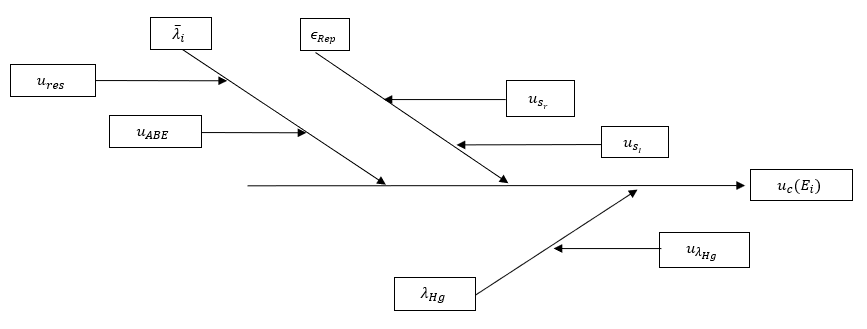

In [18]:
Ishikawa_1 = r"C:\Users\Abraham Alfaro\Documents/TEC/2022/II SEMESTRE/TFG/Códigos en Jupyter para procesamiento de datos/Img/Ishikawa Primario.PNG"
Image(filename = Ishikawa_1, width=500, height=500)

Para $\bar{\lambda_{i}}$ se tiene que:
$$
\boxed{u_{res} = \frac{d}{\sqrt{12}}}
$$

$$
d = 0,01\ \text{nm}
$$

$$
\boxed{u_{ABE} = \frac{s_{ponderada_{máxima}}}{\sqrt{3}}}
$$
Para $\epsilon_{rep}$ se tienen dos enfoques:
* Enfoque 1:
$$
\boxed{u_{s_{r}}= \frac{s_{r}}{\sqrt{n}}}
$$
* Enfoque 2:
$$
\boxed{u_{s_{I}}= s_I}
$$

Para $\lambda_{Hg}$ se tiene que:
$$
\boxed{u_{\lambda_{Hg}}=0}
$$

## Importación de datos

In [19]:
# Se importan los datos en crudo necesarios para la validación de la hoja de cálculo
path = r"C:\Users\Abraham Alfaro\Documents\TEC\2022\II SEMESTRE\TFG\Entregables\Documentación - Protocolos - Hojas de Cálculo\Hojas de cálculo\Base_de_datos_validación_GS_SMI_FM_01.xlsx"
hoja_longitudes = pd.read_excel(path,sheet_name="Longitudes Onda Promedio",header=0)
hoja_DesABE = pd.read_excel(path,sheet_name="Desviaciones ABE Max Promedio",header=0)
hoja_sr = pd.read_excel(path,sheet_name="sr",header=0)
hoja_sI = pd.read_excel(path,sheet_name="sI",header=0)

In [20]:
# Se definen los arrays que contendrán los promedios mancomunados de las longitudes de onda en función del ABE
# Estos valores se utilizan en la validación del primario
longitudes_promedio_ABE1 = hoja_longitudes["ABE = 0.1 nm"].values
longitudes_promedio_ABE2 = hoja_longitudes["ABE = 0.5 nm"].dropna().values
longitudes_promedio_ABE3 = hoja_longitudes["ABE = 1 nm"].dropna().values
longitudes_promedio_ABE4 = hoja_longitudes["ABE = 2 nm"].dropna().values

In [21]:
# Se definen los arrays que contendrán las desviaciones ponderadas máximas del ABE
# Estos valores se utilizan a lo largo de toda la validación
s_max_ABE1 = hoja_DesABE["ABE = 0.1 nm"][0]
s_max_ABE2 = hoja_DesABE["ABE = 0.5 nm"][0]
s_max_ABE3 = hoja_DesABE["ABE = 1 nm"][0]
s_max_ABE4 = hoja_DesABE["ABE = 2 nm"][0]

In [22]:
# Se definen los arrays que contendrán las desviaciones por repetibilidad dentro de los días en función del ABE
# Estos valores se utilizan en la validación del primario
sr_ABE1 = hoja_sr["ABE = 0.1 nm"].values
sr_ABE2 = hoja_sr["ABE = 0.5 nm"].dropna().values
sr_ABE3 = hoja_sr["ABE = 1 nm"].dropna().values
sr_ABE4 = hoja_sr["ABE = 2 nm"].dropna().values

In [23]:
# Se definen los arrays que contendrán las desviaciones por repetibilidad intermedia en función del ABE
# Estos valores se utilizan en la validación del primario
sI_ABE1 = hoja_sI["ABE = 0.1 nm"].values
sI_ABE2 = hoja_sI["ABE = 0.5 nm"].dropna().values
sI_ABE3 = hoja_sI["ABE = 1 nm"].dropna().values
sI_ABE4 = hoja_sI["ABE = 2 nm"].dropna().values

## Validación del los resultados del Método Primario

### ABE = 0,1 nm

In [24]:
# Defino el ABE a validar
ABE  = 0.1

# Selecciono los parámetros correspondientes
longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio = Selecciona_Parametros_Primario(ABE)

# Cálculo de todos los valores a validar
error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2, u_sr, u_reproducibilidad = Valida_Formulario_Primario(longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio) 

# Cálculo del factor de cobertura para las distribuciones trapezoidales del Enfoque 1
k_Enf1 = Calculo_k(error_Enf1,incertidumbre_estandar_comb_Enf1, 0.9545)

# Cálculo del Data Frame Final de los primarios
df_final_ABE1 = DataFrame_Final_Primario(k_Enf1, longitudes_Hg_NIST, error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2)

In [25]:
# Graficación
ilongitud = 0
Graficas_Primario(False, u_ABE, u_sr[ilongitud], u_reproducibilidad[ilongitud], error_Enf1[ilongitud], error_Enf2[ilongitud])

### ABE = 0,5 nm

In [26]:
# Defino el ABE a validar
ABE  = 0.5

# Selecciono los parámetros correspondientes
longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio = Selecciona_Parametros_Primario(ABE)

# Cálculo de todos los valores a validar
error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2, u_sr, u_reproducibilidad = Valida_Formulario_Primario(longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio) 

# Cálculo del factor de cobertura para las distribuciones trapezoidales del Enfoque 1
k_Enf1 = Calculo_k(error_Enf1,incertidumbre_estandar_comb_Enf1, 0.9545)

df_final_ABE2 = DataFrame_Final_Primario(k_Enf1, longitudes_Hg_NIST, error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2)

In [27]:
# Graficación
ilongitud = 0
Graficas_Primario(False, u_ABE, u_sr[ilongitud], u_reproducibilidad[ilongitud], error_Enf1[ilongitud], error_Enf2[ilongitud])

### ABE = 1 nm

In [28]:
# Defino el ABE a validar
ABE  = 1

# Selecciono los parámetros correspondientes
longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio = Selecciona_Parametros_Primario(ABE)

# Cálculo de todos los valores a validar
error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2, u_sr, u_reproducibilidad = Valida_Formulario_Primario(longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio) 

# Cálculo del factor de cobertura para las distribuciones trapezoidales del Enfoque 1
k_Enf1 = Calculo_k(error_Enf1,incertidumbre_estandar_comb_Enf1, 0.9545)

df_final_ABE3 = DataFrame_Final_Primario(k_Enf1, longitudes_Hg_NIST, error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2)

In [29]:
# Graficación
ilongitud = 0
Graficas_Primario(False, u_ABE, u_sr[ilongitud], u_reproducibilidad[ilongitud], error_Enf1[ilongitud], error_Enf2[ilongitud])

### ABE = 2 nm

In [30]:
# Defino el ABE a validar
ABE  = 2

# Selecciono los parámetros correspondientes
longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio = Selecciona_Parametros_Primario(ABE)

# Cálculo de todos los valores a validar
error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2, u_sr, u_reproducibilidad = Valida_Formulario_Primario(longitudes_Hg_NIST, u_ABE, sr, sI, longitudes_promedio) 

# Cálculo del factor de cobertura para las distribuciones trapezoidales del Enfoque 1
k_Enf1 = Calculo_k(error_Enf1,incertidumbre_estandar_comb_Enf1, 0.9545)

df_final_ABE4 = DataFrame_Final_Primario(k_Enf1, longitudes_Hg_NIST, error_Enf1, error_Enf2, error_promedio_Enf1, error_promedio_Enf2, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_sr, incertidumbre_estandar_reproducibilidad, incertidumbre_estandar_comb_Enf1, incertidumbre_estandar_comb_Enf2)

In [31]:
# Graficación
ilongitud = 0
Graficas_Primario(False, u_ABE, u_sr[ilongitud], u_reproducibilidad[ilongitud], error_Enf1[ilongitud], error_Enf2[ilongitud])

### Resultados de validación

In [32]:
df_final_ABE1

,Longitud de onda,"$\bar{E}_{i}$ (nm), Enf 1",$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{s_{r}}$ (nm),"$u_{c}$ (nm), Enf 1",k,"$\bar{E}_{i}$ (nm), Enf 2",$u_{reprod}$ (nm),"$u_{c}$ (nm), Enf 2"
0,253.6517,0.003967,0.002886,0.000592,0.000882,0.003075,1.78,0.003954,0.028922,0.029071
1,312.5668,0.006867,0.002886,0.000592,0.001347,0.003240,1.84,0.006860,0.022369,0.022562
2,313.1548,0.018866,0.002886,0.000592,0.001347,0.003240,1.84,0.018850,0.025682,0.025850
3,365.0153,-0.009300,0.002886,0.000592,0.001154,0.003164,1.82,-0.009313,0.029468,0.029617
4,365.4836,-0.005600,0.002886,0.000592,0.001440,0.003280,1.85,-0.005612,0.027509,0.027665
5,366.3279,-0.003900,0.002886,0.000592,0.001440,0.003280,1.85,-0.003883,0.026230,0.026395
6,404.6563,-0.011300,0.002886,0.000592,0.001202,0.003182,1.82,-0.011316,0.031432,0.031570
7,435.8328,-0.009467,0.002886,0.000592,0.000817,0.003058,1.77,-0.009472,0.025766,0.025934
8,546.0735,-0.014500,0.002886,0.000592,0.000962,0.003100,1.79,-0.014496,0.027222,0.027382


In [33]:
df_final_ABE2

,Longitud de onda,"$\bar{E}_{i}$ (nm), Enf 1",$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{s_{r}}$ (nm),"$u_{c}$ (nm), Enf 1",k,"$\bar{E}_{i}$ (nm), Enf 2",$u_{reprod}$ (nm),"$u_{c}$ (nm), Enf 2"
0,253.6517,-0.007700,0.002886,0.001116,0.001305,0.003358,1.87,-0.007686,0.030055,0.030214
1,313.1548,0.014867,0.002886,0.001116,0.000577,0.003148,1.82,0.014865,0.025895,0.026079
2,365.0153,-0.006300,0.002886,0.001116,0.001503,0.003440,1.89,-0.006284,0.027632,0.027805
3,404.6563,-0.015633,0.002886,0.001116,0.001305,0.003358,1.87,-0.015620,0.027321,0.027495
4,435.8328,-0.003133,0.002886,0.001116,0.001292,0.003353,1.87,-0.003126,0.027605,0.027778
5,546.0735,-0.005000,0.002886,0.001116,0.001869,0.003615,1.91,-0.004990,0.044619,0.044726


In [34]:
df_final_ABE3

,Longitud de onda,"$\bar{E}_{i}$ (nm), Enf 1",$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{s_{r}}$ (nm),"$u_{c}$ (nm), Enf 1",k,"$\bar{E}_{i}$ (nm), Enf 2",$u_{reprod}$ (nm),"$u_{c}$ (nm), Enf 2"
0,253.6517,0.000633,0.002886,0.001045,0.001503,0.003417,1.88,0.000636,0.040449,0.040566
1,313.1548,-0.016967,0.002886,0.001045,0.002518,0.003970,1.94,-0.016975,0.038846,0.038966
2,365.0153,0.009033,0.002886,0.001045,0.001774,0.003545,1.90,0.009029,0.039810,0.039928
3,404.6563,-0.011633,0.002886,0.001045,0.002211,0.003782,1.93,-0.011657,0.042902,0.043014
4,435.8328,0.000865,0.002886,0.001045,0.001551,0.003438,1.89,0.000867,0.033492,0.033631
5,546.0735,-0.006500,0.002886,0.001045,0.001232,0.003307,1.86,-0.006510,0.026855,0.027029


In [35]:
df_final_ABE4

,Longitud de onda,"$\bar{E}_{i}$ (nm), Enf 1",$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{s_{r}}$ (nm),"$u_{c}$ (nm), Enf 1",k,"$\bar{E}_{i}$ (nm), Enf 2",$u_{reprod}$ (nm),"$u_{c}$ (nm), Enf 2"
0,253.6517,0.013633,0.002886,0.002528,0.002750,0.004721,1.97,0.013643,0.044994,0.045157
1,313.1548,0.010534,0.002886,0.002528,0.003906,0.005476,1.98,0.010527,0.068143,0.068249
2,365.0153,0.026367,0.002886,0.002528,0.002219,0.004433,1.96,0.026360,0.032464,0.032690
3,404.6563,0.013533,0.002886,0.002528,0.003677,0.005314,1.98,0.013540,0.047641,0.047798
4,435.8328,0.019534,0.002886,0.002528,0.002317,0.004481,1.96,0.019512,0.042472,0.042644
5,546.0735,0.005166,0.002886,0.002528,0.002816,0.004758,1.97,0.005171,0.036209,0.036413


# Segunda etapa: cuantificación de las longitudes de onda promedio de transmitancia mínima medidas del SRM 2034

Esta segunda etapá se compone de tres sub etapas distintas para cada rapidez de barrido y para cada ABE. Cada una determina por el cómo se toman en consideración los resultados del procedimiento primario de la primera etapa.
* La sub-etapa 1 cuantifica las longitudes de transmitancia mínima tomando en consideración una corrección resultante de los promedios de los errores de medida primarios a partir del enfoque 1 así como la incertidumbre estándar combinada máxima dependiendo del ABE.
* La sub-etapa 2 cuantifica las longitudes de transmitancia mínima tomando en consideración un ajuste OLS a partir de los resultados del primario y la incertidumbre global asociada a dicho ajuste.
* La sub-etapa 3 cuantifica las longitudes de transmitancia mínima tomando en consideración el NO corregir, y el tomar la incertidumbre estádar combinada máxima (del enfoque 2) de los errores de medida del ABE respectivo como la fuente de incertidumbre por el error primario.

## Rapidez de barrido baja: 14.91 nm/min

### Sub-Etapa 1: Análisis del enfoque 1, corrrigiendo y tomando la incertidumbre estándar combinada máxima del error de medida en función del ABE.

La determinación de las longitudes de onda de transmitancia mínima del filtro de óxido de holmio SRM 2034, se obtiene mediante el siguiente 
modelo:

$$
\lambda_{EFAR_{i}} = \bar{\lambda_{i}}+C_{error}
$$
donde:
* $\lambda_{EFAR_{i}}$ es la medición del EFAR de la i-ésima banda de transmitancia mínima del filtro SRM 2034.
* $\bar{\lambda_{i}}$ es el promedio de las mediciones del EFAR de la i-ésima banda de transmitancia mínima del filtro SRM 2034.
* $C_{error}$ es la corrección originda por los datos del método primario de la primera etapa.

El diagrama de Ishikawa muestra las siguientes fuentes de incertidumbre para cada magnitud de entrada del modelo:

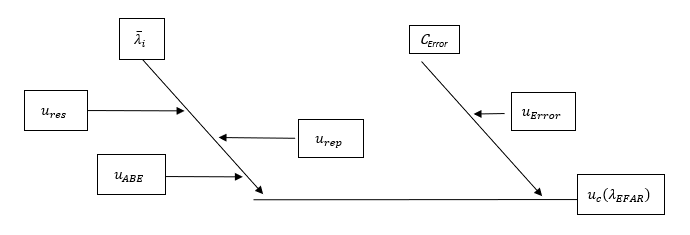

In [36]:
Ishikawa_2 = r"C:\Users\Abraham Alfaro\Documents/TEC/2022/II SEMESTRE/TFG/Códigos en Jupyter para procesamiento de datos/Img/Ishikawa_VelBaja_1.1.PNG"
Image(filename = Ishikawa_2, width=500, height=500)

Para $\bar{\lambda_{i}}$ se tiene que:
$$
\boxed{u_{res} = \frac{d}{\sqrt{12}}}
$$

$$
d = 0,01\ \text{nm}
$$

$$
\boxed{u_{ABE} = \frac{s_{ponderada_{máxima}}}{\sqrt{3}}}
$$

$$
\boxed{u_{rep} = \frac{s_{\lambda_{i}}}{\sqrt{n}}}
$$
Para $C_{error}$ se tiene que:
$$
\boxed{u_{Error_{máx}}=\frac{U_{Error_{máx}}}{\sqrt{3}}}
$$

#### Importación de datos

In [37]:
# Se importan los datos en crudo necesarios para la validación de la hoja de cálculo en la segunda etapa

# Se importan los valores de longitudes promedio medidos del SRM a una velocidad baja
hoja_longitudes_SRM_Vel_Baja = pd.read_excel(path,sheet_name="Longitudes Promedio SRM VelBaja",header=0)

# Se importan los valores de las correcciones para el enfoque 1.1 (Las mismas para todas las RB)
hoja_correcciones_SRM_Enf11 = pd.read_excel(path,sheet_name="Corrección SRM Enf1.1",header=0)

# Se importan los valores de las desviaciones estándar obtenidas con la RB baja
hoja_Des_SRM_Vel_Baja = pd.read_excel(path,sheet_name="s SRM 2034 Vel Baj",header=0)

# Se importan los valores de las incertidumbres combinadas máximas del Enfoque 1 (Primario) para Enf 1.1
hoja_uComb_Primario_Max_Enf1 = pd.read_excel(path,sheet_name="uComb Primario Max Enf 1",header=0)

# Se importan los valores de las incertidumbres combinadas máximas del Enfoque 2 (Primario) para Enf 2
hoja_uComb_Primario_Max_Enf2 = pd.read_excel(path,sheet_name="uComb Primario Max Enf 2",header=0)

# Se importan los valores del certificado del SRM 2034
hoja_Certificado_SRM2034 = pd.read_excel(path,sheet_name="Certificado SRM 2034",header=0)

In [38]:
# Se definen los arrays que contendrán los promedios mancomunados de las longitudes de onda de 
# transmitancia mínima en función del ABE

# Se definen las longitudes de onda promedio para: ABE = 0.1 nm y RB = 14.91 nm/min
longitudes_promedio_SRM_Vel_Baja_ABE1 = hoja_longitudes_SRM_Vel_Baja["ABE = 0.1 nm"].dropna().values

# Se definen las longitudes de onda promedio para: ABE = 0.5 nm y RB = 14.91 nm/min
longitudes_promedio_SRM_Vel_Baja_ABE2 = hoja_longitudes_SRM_Vel_Baja["ABE = 0.5 nm"].dropna().values

# Se definen las longitudes de onda promedio para: ABE = 1 nm y RB = 14.91 nm/min
longitudes_promedio_SRM_Vel_Baja_ABE3 = hoja_longitudes_SRM_Vel_Baja["ABE = 1 nm"].values

# Se definen las longitudes de onda promedio para: ABE = 2 nm y RB = 14.91 nm/min
longitudes_promedio_SRM_Vel_Baja_ABE4 = hoja_longitudes_SRM_Vel_Baja["ABE = 2 nm"].values

In [39]:
# Se definen los arrays que contendrán los valores certificados del NIST de las bandas de transmitancia 
# mínima del SRM 2034

# Se definen los valores de las bandas de %T mínima para un ABE = 0.1 nm desde el Certificado del NIST
longitudes_patron_SRM_ABE1 = hoja_Certificado_SRM2034["ABE = 0.1 nm"].dropna().values

# Se definen los valores de las bandas de %T mínima para un ABE = 0.5 nm desde el Certificado del NIST
longitudes_patron_SRM_ABE2 = hoja_Certificado_SRM2034["ABE = 0.5 nm"].dropna().values

# Se definen los valores de las bandas de %T mínima para un ABE = 1 nm desde el Certificado del NIST
longitudes_patron_SRM_ABE3 = hoja_Certificado_SRM2034["ABE = 1 nm"].values

# Se definen los valores de las bandas de %T mínima para un ABE = 2 nm desde el Certificado del NIST
longitudes_patron_SRM_ABE4 = hoja_Certificado_SRM2034["ABE = 2 nm"].values

In [40]:
# Se definen los arrays que contendrán las U certificadas del NIST de las bandas de transmitancia 
# mínima del SRM 2034

# Se definen los valores de las incertidumbres expandidas para un ABE = 0.1 nm desde el Certificado del NIST
U_longitudes_patron_SRM_ABE1 = hoja_Certificado_SRM2034["U.1 (nm)"].dropna().values

# Se definen los valores de las incertidumbres expandidas para un ABE = 0.5 nm desde el Certificado del NIST
U_longitudes_patron_SRM_ABE2 = hoja_Certificado_SRM2034["U.2 (nm)"].dropna().values

# Se definen los valores de las incertidumbres expandidas para un ABE = 1 nm desde el Certificado del NIST
U_longitudes_patron_SRM_ABE3 = hoja_Certificado_SRM2034["U.3 (nm)"].values

# Se definen los valores de las incertidumbres expandidas para un ABE = 2 nm desde el Certificado del NIST
U_longitudes_patron_SRM_ABE4 = hoja_Certificado_SRM2034["U.4 (nm)"].values

In [41]:
# Se definen los arrays que contendrán las desviaciones estándar de las bandas de transmitancia mínima 
# en función del ABE

# Se definen los valores de las desviaciones estándar para: ABE = 0.1 nm y RB = 14.91 nm/min 
s_SRM_Vel_Baja_ABE1 = hoja_Des_SRM_Vel_Baja["ABE = 0.1 nm"].dropna().values

# Se definen los valores de las desviaciones estándar para: ABE = 0.5 nm y RB = 14.91 nm/min
s_SRM_Vel_Baja_ABE2 = hoja_Des_SRM_Vel_Baja["ABE = 0.5 nm"].dropna().values

# Se definen los valores de las desviaciones estándar para: ABE = 1 nm y RB = 14.91 nm/min
s_SRM_Vel_Baja_ABE3 = hoja_Des_SRM_Vel_Baja["ABE = 1 nm"].values

# Se definen los valores de las desviaciones estándar para: ABE = 2 nm y RB = 14.91 nm/min
s_SRM_Vel_Baja_ABE4 = hoja_Des_SRM_Vel_Baja["ABE = 2 nm"].values

In [42]:
# Se definen los arrays que contendrán las incertidumbres combinadas máximas del primario en función del ABE
uComb_Max_Enf1_ABE1 = hoja_uComb_Primario_Max_Enf1["ABE = 0.1 nm"][0]
uComb_Max_Enf1_ABE2 = hoja_uComb_Primario_Max_Enf1["ABE = 0.5 nm"][0]
uComb_Max_Enf1_ABE3 = hoja_uComb_Primario_Max_Enf1["ABE = 1 nm"][0]
uComb_Max_Enf1_ABE4 = hoja_uComb_Primario_Max_Enf1["ABE = 2 nm"][0]

In [43]:
# Se definen los arrays que contendrán las incertidumbres combinadas máximas del primario en función del ABE
uComb_Max_Enf2_ABE1 = hoja_uComb_Primario_Max_Enf2["ABE = 0.1 nm"][0]
uComb_Max_Enf2_ABE2 = hoja_uComb_Primario_Max_Enf2["ABE = 0.5 nm"][0]
uComb_Max_Enf2_ABE3 = hoja_uComb_Primario_Max_Enf2["ABE = 1 nm"][0]
uComb_Max_Enf2_ABE4 = hoja_uComb_Primario_Max_Enf2["ABE = 2 nm"][0]

In [44]:
# Se definen los arrays que contendrán las correcciones para el Enf 1.1 
# que surgen del primario en función del ABE
Correccion_ABE1 = hoja_correcciones_SRM_Enf11["ABE = 0.1 nm"][0]
Correccion_ABE2 = hoja_correcciones_SRM_Enf11["ABE = 0.5 nm"][0]
Correccion_ABE3 = hoja_correcciones_SRM_Enf11["ABE = 1 nm"][0]
Correccion_ABE4 = hoja_correcciones_SRM_Enf11["ABE = 2 nm"][0]

#### Resultados de validación

##### ABE = 0.1 nm

In [45]:
ABE = 0.1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,240.97,240.976710,0.002707,0.002886,0.000592,1.632666e-03,0.003787,0.005066,1.93,0.132
1,249.78,249.752707,0.002707,0.002886,0.000592,0.000000e+00,0.003788,0.004798,1.92,-0.536
2,278.15,278.192708,0.002707,0.002886,0.000592,6.668199e-03,0.003787,0.008212,1.99,0.812
3,287.03,287.011709,0.002707,0.002886,0.000592,5.261706e-03,0.003788,0.007121,1.99,-0.352
4,333.48,333.462705,0.002707,0.002886,0.000592,6.667085e-03,0.003788,0.008215,1.99,-0.400
5,345.46,345.423707,0.002707,0.002886,0.000592,6.741647e-03,0.003788,0.008273,1.99,-0.689
6,361.27,361.283706,0.002707,0.002886,0.000592,7.373864e-03,0.003787,0.008798,1.99,0.259
7,385.36,385.358708,0.002707,0.002886,0.000592,3.054923e-03,0.003788,0.005689,1.96,-0.025
8,416.02,416.040712,0.002707,0.002886,0.000592,4.422070e-03,0.003788,0.006524,1.98,0.401
9,467.78,467.782707,0.002707,0.002886,0.000592,8.163176e-03,0.003787,0.009468,2.00,0.061


##### ABE = 0.5 nm

In [46]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE)
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.050815,0.003817,0.002886,0.001116,1.527137e-03,0.004174,0.005415,1.92,0.602
1,249.81,249.853816,0.003817,0.002886,0.001116,9.474057e-15,0.004174,0.005194,1.91,0.858
2,278.15,278.158814,0.003817,0.002886,0.001116,1.666772e-03,0.004173,0.005456,1.93,0.172
3,287.08,287.072817,0.003817,0.002886,0.001116,9.997217e-04,0.004175,0.005292,1.92,-0.141
4,333.47,333.466817,0.003817,0.002886,0.001116,2.133916e-03,0.004174,0.005619,1.94,-0.062
5,345.43,345.415811,0.003817,0.002886,0.001116,5.538213e-03,0.004174,0.007593,1.98,-0.272
6,361.27,361.303816,0.003817,0.002886,0.001116,1.895343e-14,0.004174,0.005196,1.91,0.662
7,385.45,385.421817,0.003817,0.002886,0.001116,3.590144e-03,0.004173,0.006315,1.96,-0.672
8,416.07,416.103817,0.003817,0.002886,0.001116,0.000000e+00,0.004174,0.005197,1.91,0.662
9,467.80,467.823819,0.003817,0.002886,0.001116,4.216136e-03,0.004174,0.006692,1.97,0.565


##### ABE = 1 nm

In [47]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE)
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.136092,0.004094,0.002886,0.001045,2.493813e-03,0.004584,0.006054,1.93,0.313
1,249.89,249.873089,0.004094,0.002886,0.001045,6.405672e-03,0.004585,0.008455,1.99,-0.320
2,278.13,278.134091,0.004094,0.002886,0.001045,2.581909e-03,0.004585,0.006091,1.93,0.080
3,287.22,287.210096,0.004094,0.002886,0.001045,1.632966e-03,0.004585,0.005755,1.91,-0.193
4,333.48,333.484094,0.004094,0.002886,0.001045,5.578613e-03,0.004585,0.007846,1.98,0.078
5,345.38,345.404094,0.004094,0.002886,0.001045,1.894325e-14,0.004585,0.005517,1.90,0.471
6,361.25,361.274094,0.004094,0.002886,0.001045,2.981267e-03,0.004584,0.006271,1.94,0.467
7,385.61,385.650092,0.004094,0.002886,0.001045,2.667125e-03,0.004585,0.006126,1.94,0.958
8,416.25,416.298092,0.004094,0.002886,0.001045,4.000210e-03,0.004585,0.006816,1.96,0.928
9,451.45,451.454093,0.004094,0.002886,0.001045,1.894946e-14,0.004585,0.005519,1.90,0.080


##### ABE = 2 nm

In [48]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.035201,-0.014794,0.002886,0.002528,0.000000e+00,0.006323,0.007396,1.88,-1.626
1,250.03,250.018209,-0.014794,0.002886,0.002528,8.308575e-03,0.006323,0.011125,1.98,-0.215
2,278.10,278.025207,-0.014794,0.002886,0.002528,0.000000e+00,0.006322,0.007397,1.88,-1.434
3,287.52,287.425209,-0.014794,0.002886,0.002528,9.997965e-03,0.006322,0.012438,1.99,-1.697
4,333.47,333.435207,-0.014794,0.002886,0.002528,1.894907e-14,0.006324,0.007397,1.88,-0.667
5,345.42,345.385203,-0.014794,0.002886,0.002528,1.894285e-14,0.006323,0.007397,1.88,-0.667
6,361.12,361.135206,-0.014794,0.002886,0.002528,4.472112e-03,0.006323,0.008642,1.94,0.287
7,385.80,385.829203,-0.014794,0.002886,0.002528,4.988644e-03,0.006323,0.008922,1.95,0.667
8,416.57,416.585211,-0.014794,0.002886,0.002528,0.000000e+00,0.006322,0.007394,1.88,0.292
9,451.32,451.285206,-0.014794,0.002886,0.002528,1.893984e-14,0.006322,0.007396,1.88,-0.816


### Sub-Etapa 2: Análisis del enfoque 1, tomando en consideración un ajuste OLS a partir de los resultados del primario y la incertidumbre asociada a dicho ajuste.

La determinación de las longitudes de onda de transmitancia mínima del filtro de óxido de holmio SRM 2034, se obtiene mediante el siguiente 
modelo:

$$
\lambda_{EFAR_{i}} = \bar{\lambda_{i}}+C_{error}
$$
donde:
* $\lambda_{EFAR_{i}}$ es la medición del EFAR de la i-ésima banda de transmitancia mínima del filtro SRM 2034.
* $\bar{\lambda_{i}}$ es el promedio de las mediciones del EFAR de la i-ésima banda de transmitancia mínima del filtro SRM 2034.
* $C_{error}$ es la corrección originda por los datos del método primario de la primera etapa a partir de un ajuste lineal OLS

El diagrama de Ishikawa muestra las siguientes fuentes de incertidumbre para cada magnitud de entrada del modelo:

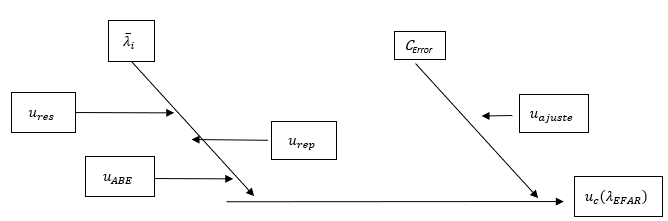

In [49]:
Ishikawa_3 = r"C:\Users\Abraham Alfaro\Documents/TEC/2022/II SEMESTRE/TFG/Códigos en Jupyter para procesamiento de datos/Img/Ishikawa_VelBaja_1.2.PNG"
Image(filename = Ishikawa_3, width=500, height=500)

Para $\bar{\lambda_{i}}$ se tiene que:
$$
\boxed{u_{res} = \frac{d}{\sqrt{12}}}
$$

$$
d = 0,01\ \text{nm}
$$

$$
\boxed{u_{ABE} = \frac{s_{ponderada_{máxima}}}{\sqrt{3}}}
$$

$$
\boxed{u_{rep} = \frac{s_{\lambda_{i}}}{\sqrt{n}}}
$$
Para $C_{error}$ se tiene que:
$$
\boxed{u_{ajuste}=s_{ajuste}}
$$
donde:
$$
\boxed{s_{ajuste}=\sqrt{\dfrac{\sum(residuales)^2}{n-2}}}
$$

#### Importación de datos

In [50]:
# Se extraen los valores de las pendientes e intersección de los ajustes (Enf 1.2) en función del ABE
hoja_Parametros_OLS_SRM = pd.read_excel(path,sheet_name="Corrección SRM Enf1.2",header=0)
m_ABE1, b_ABE1, s_ajuste_ABE1 = hoja_Parametros_OLS_SRM["ABE = 0.1 nm"][0], hoja_Parametros_OLS_SRM["ABE = 0.1 nm"][1], hoja_Parametros_OLS_SRM["ABE = 0.1 nm"][2]
m_ABE2, b_ABE2, s_ajuste_ABE2 = hoja_Parametros_OLS_SRM["ABE = 0.5 nm"][0], hoja_Parametros_OLS_SRM["ABE = 0.5 nm"][1], hoja_Parametros_OLS_SRM["ABE = 0.5 nm"][2]
m_ABE3, b_ABE3, s_ajuste_ABE3 = hoja_Parametros_OLS_SRM["ABE = 1 nm"][0], hoja_Parametros_OLS_SRM["ABE = 1 nm"][1], hoja_Parametros_OLS_SRM["ABE = 1 nm"][2]
m_ABE4, b_ABE4, s_ajuste_ABE4 = hoja_Parametros_OLS_SRM["ABE = 2 nm"][0], hoja_Parametros_OLS_SRM["ABE = 2 nm"][1], hoja_Parametros_OLS_SRM["ABE = 2 nm"][2]

#### Resultados de la validación

##### ABE = 0.1

In [51]:
ABE = 0.1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, s_ajuste_ABE1, m_ABE1, b_ABE1)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,240.97,240.964224,-0.009779,0.002886,0.000592,1.633148e-03,0.007679,0.008386,2.0,-0.110
1,249.78,249.741048,-0.008953,0.002886,0.000592,0.000000e+00,0.007679,0.008223,2.0,-0.740
2,278.15,278.183729,-0.006276,0.002886,0.000592,6.667856e-03,0.007680,0.010587,2.0,0.621
3,287.03,287.003551,-0.005446,0.002886,0.000592,5.260529e-03,0.007678,0.009767,2.0,-0.493
4,333.48,333.458927,-0.001074,0.002886,0.000592,6.668723e-03,0.007678,0.010589,2.0,-0.466
5,345.46,345.421050,0.000052,0.002886,0.000592,6.741126e-03,0.007675,0.010634,2.0,-0.717
6,361.27,361.282542,0.001544,0.002886,0.000592,7.369412e-03,0.007681,0.011044,2.0,0.229
7,385.36,385.359811,0.003810,0.002886,0.000592,3.055473e-03,0.007679,0.008773,2.0,-0.004
8,416.02,416.044698,0.006698,0.002886,0.000592,4.423904e-03,0.007677,0.009339,2.0,0.463
9,467.78,467.791571,0.011568,0.002886,0.000592,8.165889e-03,0.007679,0.011590,2.0,0.250


##### ABE = 0.5 nm

In [52]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, s_ajuste_ABE2, m_ABE2, b_ABE2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.047524,0.000528,0.002886,0.001116,1.527714e-03,0.011020,0.011548,2.0,0.500
1,249.81,249.850726,0.000727,0.002886,0.001116,9.471592e-15,0.011017,0.011442,2.0,0.741
2,278.15,278.156369,0.001367,0.002886,0.001116,1.666510e-03,0.011014,0.011560,2.0,0.116
3,287.08,287.070566,0.001569,0.002886,0.001116,9.997059e-04,0.011016,0.011486,2.0,-0.171
4,333.47,333.465616,0.002619,0.002886,0.001116,2.134825e-03,0.011013,0.011637,2.0,-0.079
5,345.43,345.414885,0.002889,0.002886,0.001116,5.537633e-03,0.011019,0.012712,2.0,-0.269
6,361.27,361.303247,0.003249,0.002886,0.001116,1.894845e-14,0.011016,0.011442,2.0,0.605
7,385.45,385.421796,0.003795,0.002886,0.001116,3.589653e-03,0.011011,0.011985,2.0,-0.605
8,416.07,416.104488,0.004489,0.002886,0.001116,0.000000e+00,0.011021,0.011446,2.0,0.627
9,467.80,467.825658,0.005659,0.002886,0.001116,4.216663e-03,0.011015,0.012193,2.0,0.548


##### ABE = 1 nm

In [53]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, s_ajuste_ABE3, m_ABE3, b_ABE3)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.135412,0.003416,0.002886,0.001045,2.494371e-03,0.010561,0.011278,2.0,0.281
1,249.89,249.872458,0.003457,0.002886,0.001045,6.403251e-03,0.010562,0.012728,2.0,-0.313
2,278.13,278.133589,0.003589,0.002886,0.001045,2.582492e-03,0.010567,0.011301,2.0,0.065
3,287.22,287.209628,0.003631,0.002886,0.001045,1.632470e-03,0.010567,0.011124,2.0,-0.190
4,333.48,333.483842,0.003847,0.002886,0.001045,5.578444e-03,0.010570,0.012335,2.0,0.069
5,345.38,345.403903,0.003903,0.002886,0.001045,1.894848e-14,0.010564,0.011001,2.0,0.438
6,361.25,361.273976,0.003977,0.002886,0.001045,2.981419e-03,0.010568,0.011401,2.0,0.436
7,385.61,385.650096,0.004091,0.002886,0.001045,2.666401e-03,0.010562,0.011318,2.0,0.872
8,416.25,416.298237,0.004234,0.002886,0.001045,4.001407e-03,0.010565,0.011706,2.0,0.874
9,451.45,451.454400,0.004398,0.002886,0.001045,1.894433e-14,0.010561,0.010998,2.0,0.081


##### ABE = 2 nm

In [54]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, s_ajuste_ABE4, m_ABE4, b_ABE4)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.032096,-0.017906,0.002886,0.002528,0.000000e+00,0.007848,0.008735,2.0,-1.660
1,250.03,250.015291,-0.017714,0.002886,0.002528,8.304724e-03,0.007851,0.012057,2.0,-0.265
2,278.10,278.022883,-0.017114,0.002886,0.002528,0.000000e+00,0.007850,0.008738,2.0,-1.456
3,287.52,287.423090,-0.016913,0.002886,0.002528,9.997797e-03,0.007851,0.013280,2.0,-1.712
4,333.47,333.434073,-0.015928,0.002886,0.002528,1.894160e-14,0.007852,0.008740,2.0,-0.678
5,345.42,345.384322,-0.015672,0.002886,0.002528,1.894617e-14,0.007849,0.008736,2.0,-0.674
6,361.12,361.134666,-0.015335,0.002886,0.002528,4.470573e-03,0.007850,0.009814,2.0,0.273
7,385.80,385.829194,-0.014807,0.002886,0.002528,4.987490e-03,0.007853,0.010066,2.0,0.652
8,416.57,416.585851,-0.014148,0.002886,0.002528,0.000000e+00,0.007851,0.008738,2.0,0.299
9,451.32,451.286597,-0.013405,0.002886,0.002528,1.894499e-14,0.007848,0.008734,2.0,-0.765


### Sub-etapa 3: cuantifica las longitudes de transmitancia mínima tomando en consideración el NO corregir, y el tomar la incertidumbre estádar combinada máxima de los errores de medida del ABE respectivo como la fuente de incertidumbre por el error primario del enfoque 2.

La determinación de las longitudes de onda de transmitancia mínima del filtro de óxido de holmio SRM 2034, se obtiene mediante el siguiente 
modelo:

$$
\lambda_{EFAR_{i}} = \bar{\lambda_{i}}+\epsilon_{error}
$$
donde:
* $\lambda_{EFAR_{i}}$ es la medición del EFAR de la i-ésima banda de transmitancia mínima del filtro SRM 2034.
* $\bar{\lambda_{i}}$ es el promedio de las mediciones del EFAR de la i-ésima banda de transmitancia mínima del filtro SRM 2034.
* $\epsilon_{error}$ es el aporte al modelo de la incertidumbre estándar combinada máxima del enfoque 2 del primario. Presenta media cero.

El diagrama de Ishikawa muestra las siguientes fuentes de incertidumbre para cada magnitud de entrada del modelo:

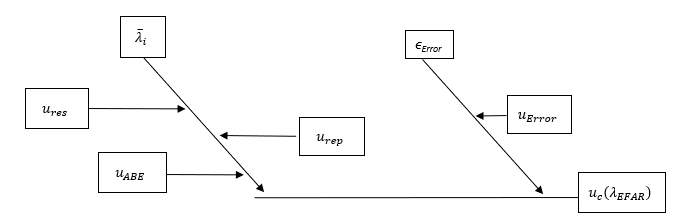

In [55]:
Ishikawa_4 = r"C:\Users\Abraham Alfaro\Documents/TEC/2022/II SEMESTRE/TFG/Códigos en Jupyter para procesamiento de datos/Img/Ishikawa_VelBaja_2.PNG"
Image(filename = Ishikawa_4, width=500, height=500)

Para $\bar{\lambda_{i}}$ se tiene que:
$$
\boxed{u_{res} = \frac{d}{\sqrt{12}}}
$$

$$
d = 0,01\ \text{nm}
$$

$$
\boxed{u_{ABE} = \frac{s_{ponderada_{máxima}}}{\sqrt{3}}}
$$

$$
\boxed{u_{rep} = \frac{s_{\lambda_{i}}}{\sqrt{n}}}
$$
Para $\epsilon_{error}$ se tiene que:
$$
\boxed{u_{Error_{máx}}=u_{comb_{máx}}}
$$

#### Resultados de la validación

##### ABE = 0.1 nm

In [56]:
ABE = 0.1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,240.97,240.974010,0.0,0.002886,0.000592,1.633256e-03,0.03157,0.031758,2.0,0.050
1,249.78,249.749970,0.0,0.002886,0.000592,0.000000e+00,0.03157,0.031706,2.0,-0.372
2,278.15,278.190015,0.0,0.002886,0.000592,6.668248e-03,0.03157,0.032394,2.0,0.489
3,287.03,287.009005,0.0,0.002886,0.000592,5.260553e-03,0.03157,0.032139,2.0,-0.258
4,333.48,333.460014,0.0,0.002886,0.000592,6.665693e-03,0.03157,0.032404,2.0,-0.262
5,345.46,345.420989,0.0,0.002886,0.000592,6.741485e-03,0.03157,0.032419,2.0,-0.476
6,361.27,361.280984,0.0,0.002886,0.000592,7.371188e-03,0.03157,0.032557,2.0,0.134
7,385.36,385.356002,0.0,0.002886,0.000592,3.056059e-03,0.03157,0.031854,2.0,-0.049
8,416.02,416.037993,0.0,0.002886,0.000592,4.420670e-03,0.03157,0.032014,2.0,0.221
9,467.78,467.779999,0.0,0.002886,0.000592,8.160877e-03,0.03157,0.032734,2.0,-0.000


##### ABE = 0.5 nm

In [57]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.046991,0.0,0.002886,0.001115,1.526948e-03,0.044725,0.044861,2.0,0.263
1,249.81,249.849990,0.0,0.002886,0.001115,9.476151e-15,0.044725,0.044830,2.0,0.390
2,278.15,278.155015,0.0,0.002886,0.001115,1.666600e-03,0.044725,0.044876,2.0,0.049
3,287.08,287.068997,0.0,0.002886,0.001115,9.999891e-04,0.044725,0.044840,2.0,-0.107
4,333.47,333.463023,0.0,0.002886,0.001115,2.134131e-03,0.044725,0.044862,2.0,-0.068
5,345.43,345.411999,0.0,0.002886,0.001115,5.538049e-03,0.044725,0.045175,2.0,-0.174
6,361.27,361.299988,0.0,0.002886,0.001115,1.894376e-14,0.044725,0.044836,2.0,0.292
7,385.45,385.418013,0.0,0.002886,0.001115,3.590154e-03,0.044725,0.044982,2.0,-0.325
8,416.07,416.099988,0.0,0.002886,0.001115,0.000000e+00,0.044725,0.044829,2.0,0.292
9,467.80,467.819985,0.0,0.002886,0.001115,4.216007e-03,0.044725,0.045024,2.0,0.203


##### ABE = 1 nm

In [58]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.132004,0.0,0.002886,0.001045,2.494340e-03,0.04302,0.043202,2.0,0.120
1,249.89,249.869012,0.0,0.002886,0.001045,6.402644e-03,0.04302,0.043625,2.0,-0.209
2,278.13,278.130007,0.0,0.002886,0.001045,2.581447e-03,0.04302,0.043226,2.0,0.000
3,287.22,287.206015,0.0,0.002886,0.001045,1.632806e-03,0.04302,0.043153,2.0,-0.140
4,333.48,333.480021,0.0,0.002886,0.001045,5.576905e-03,0.04302,0.043480,2.0,0.000
5,345.38,345.399973,0.0,0.002886,0.001045,1.894613e-14,0.04302,0.043130,2.0,0.200
6,361.25,361.269985,0.0,0.002886,0.001045,2.980012e-03,0.04302,0.043242,2.0,0.200
7,385.61,385.646029,0.0,0.002886,0.001045,2.668105e-03,0.04302,0.043194,2.0,0.378
8,416.25,416.293983,0.0,0.002886,0.001045,4.000827e-03,0.04302,0.043313,2.0,0.440
9,451.45,451.449991,0.0,0.002886,0.001045,1.894314e-14,0.04302,0.043116,2.0,-0.000


##### ABE = 2 nm

In [59]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Baja(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Baja, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Baja, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.050001,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068331,2.0,-0.481
1,250.03,250.033014,0.0,0.002886,0.002528,8.305840e-03,0.068235,0.068860,2.0,0.021
2,278.10,278.039946,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068362,2.0,-0.413
3,287.52,287.440024,0.0,0.002886,0.002528,9.999556e-03,0.068235,0.069084,2.0,-0.544
4,333.47,333.449972,0.0,0.002886,0.002528,1.894844e-14,0.068235,0.068360,2.0,-0.138
5,345.42,345.399983,0.0,0.002886,0.002528,1.894382e-14,0.068235,0.068360,2.0,-0.138
6,361.12,361.149990,0.0,0.002886,0.002528,4.470511e-03,0.068235,0.068495,2.0,0.206
7,385.80,385.843997,0.0,0.002886,0.002528,4.989156e-03,0.068235,0.068516,2.0,0.308
8,416.57,416.600000,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068360,2.0,0.206
9,451.32,451.300001,0.0,0.002886,0.002528,1.895336e-14,0.068235,0.068353,2.0,-0.140


## Rapidez de barrido media: 29.63 nm/min

### Sub-etapa 1

#### Importación de datos

In [60]:
# Se importan los datos en crudo necesarios para la validación de la hoja de cálculo en la segunda etapa

# Se importan los valores de longitudes promedio medidos del SRM a una velocidad media
hoja_longitudes_SRM_Vel_Med = pd.read_excel(path,sheet_name="Longitudes Promedio SRM VelMed",header=0)

# Se importan los valores de las correcciones para el enfoque 1.1 (Las mismas para todas las RB)
hoja_correcciones_SRM_Enf11 = pd.read_excel(path,sheet_name="Corrección SRM Enf1.1",header=0)

# Se importan los valores de las desviaciones estándar obtenidas con la RB media
hoja_Des_SRM_Vel_Med = pd.read_excel(path,sheet_name="s SRM 2034 Vel Med",header=0)

# Se importan los valores de las incertidumbres combinadas máximas del Enfoque 1 (Primario) para Enf 1.1
hoja_uComb_Primario_Max_Enf1 = pd.read_excel(path,sheet_name="uComb Primario Max Enf 1",header=0)

# Se importan los valores de las incertidumbres combinadas máximas del Enfoque 2 (Primario) para Enf 2
hoja_uComb_Primario_Max_Enf2 = pd.read_excel(path,sheet_name="uComb Primario Max Enf 2",header=0)

# Se importan los valores del certificado del SRM 2034
hoja_Certificado_SRM2034 = pd.read_excel(path,sheet_name="Certificado SRM 2034",header=0)

In [61]:
# Se definen los arrays que contendrán los promedios mancomunados de las longitudes de onda de 
# transmitancia mínima en función del ABE

# Se definen las longitudes de onda promedio para: ABE = 0.1 nm y RB = 29.63 nm/min
longitudes_promedio_SRM_Vel_Med_ABE1 = hoja_longitudes_SRM_Vel_Med["ABE = 0.1 nm"].dropna().values

# Se definen las longitudes de onda promedio para: ABE = 0.5 nm y RB = 29.63 nm/min
longitudes_promedio_SRM_Vel_Med_ABE2 = hoja_longitudes_SRM_Vel_Med["ABE = 0.5 nm"].dropna().values

# Se definen las longitudes de onda promedio para: ABE = 1 nm y RB = 29.63 nm/min
longitudes_promedio_SRM_Vel_Med_ABE3 = hoja_longitudes_SRM_Vel_Med["ABE = 1 nm"].values

# Se definen las longitudes de onda promedio para: ABE = 2 nm y RB = 29.63 nm/min
longitudes_promedio_SRM_Vel_Med_ABE4 = hoja_longitudes_SRM_Vel_Med["ABE = 2 nm"].values

In [62]:
# Se definen los arrays que contendrán las desviaciones estándar de las bandas de transmitancia mínima 
# en función del ABE

# Se definen los valores de las desviaciones estándar para: ABE = 0.1 nm y RB = 14.91 nm/min 
s_SRM_Vel_Med_ABE1 = hoja_Des_SRM_Vel_Med["ABE = 0.1 nm"].dropna().values

# Se definen los valores de las desviaciones estándar para: ABE = 0.5 nm y RB = 14.91 nm/min
s_SRM_Vel_Med_ABE2 = hoja_Des_SRM_Vel_Med["ABE = 0.5 nm"].dropna().values

# Se definen los valores de las desviaciones estándar para: ABE = 1 nm y RB = 14.91 nm/min
s_SRM_Vel_Med_ABE3 = hoja_Des_SRM_Vel_Med["ABE = 1 nm"].values

# Se definen los valores de las desviaciones estándar para: ABE = 2 nm y RB = 14.91 nm/min
s_SRM_Vel_Med_ABE4 = hoja_Des_SRM_Vel_Med["ABE = 2 nm"].values

#### Resultados de la validación

##### ABE = 0.5 nm

In [63]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE)
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.033816,0.003817,0.002886,0.001116,9.474650e-15,0.004175,0.005198,1.91,0.271
1,249.81,249.824818,0.003817,0.002886,0.001116,6.903770e-03,0.004175,0.008643,1.99,0.280
2,278.15,278.156816,0.003817,0.002886,0.001116,1.527398e-03,0.004174,0.005416,1.92,0.133
3,287.08,287.051817,0.003817,0.002886,0.001116,1.333155e-03,0.004176,0.005363,1.92,-0.551
4,333.47,333.472814,0.003817,0.002886,0.001116,6.226768e-03,0.004176,0.008109,1.99,0.054
5,345.43,345.409814,0.003817,0.002886,0.001116,8.586546e-03,0.004174,0.010038,2.00,-0.375
6,361.27,361.289818,0.003817,0.002886,0.001116,3.711613e-03,0.004174,0.006385,1.96,0.384
7,385.45,385.435816,0.003817,0.002886,0.001116,5.924014e-03,0.004174,0.007882,1.99,-0.330
8,416.07,416.103819,0.003817,0.002886,0.001116,0.000000e+00,0.004175,0.005196,1.91,0.662
9,467.80,467.793817,0.003817,0.002886,0.001116,1.894540e-14,0.004174,0.005195,1.91,-0.150


##### ABE = 1 nm

In [64]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE)
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.128091,0.004094,0.002886,0.001045,1.633131e-03,0.004586,0.005755,1.91,0.158
1,249.89,249.904093,0.004094,0.002886,0.001045,9.475850e-15,0.004585,0.005519,1.90,0.275
2,278.13,278.124095,0.004094,0.002886,0.001045,1.894761e-14,0.004585,0.005518,1.90,-0.115
3,287.22,287.204091,0.004094,0.002886,0.001045,1.894981e-14,0.004586,0.005518,1.90,-0.311
4,333.48,333.476092,0.004094,0.002886,0.001045,1.339620e-02,0.004585,0.014488,2.00,-0.068
5,345.38,345.425095,0.004094,0.002886,0.001045,9.937624e-03,0.004586,0.011367,2.00,0.821
6,361.25,361.284095,0.004094,0.002886,0.001045,1.894456e-14,0.004585,0.005518,1.90,0.666
7,385.61,385.654096,0.004094,0.002886,0.001045,1.894604e-14,0.004585,0.005518,1.90,1.063
8,416.25,416.281096,0.004094,0.002886,0.001045,3.351070e-03,0.004586,0.006456,1.95,0.602
9,451.45,451.404096,0.004094,0.002886,0.001045,0.000000e+00,0.004585,0.005518,1.90,-0.897


##### ABE = 2 nm

In [65]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE)
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.056206,-0.014794,0.002886,0.002528,1.000291e-03,0.006323,0.007462,1.89,-1.223
1,250.03,249.965204,-0.014794,0.002886,0.002528,9.478318e-15,0.006324,0.007397,1.88,-1.243
2,278.10,278.025200,-0.014794,0.002886,0.002528,0.000000e+00,0.006321,0.007394,1.88,-1.435
3,287.52,287.435205,-0.014794,0.002886,0.002528,1.894858e-14,0.006323,0.007397,1.88,-1.626
4,333.47,333.385203,-0.014794,0.002886,0.002528,1.894590e-14,0.006323,0.007396,1.88,-1.626
5,345.42,345.405204,-0.014794,0.002886,0.002528,0.000000e+00,0.006321,0.007393,1.88,-0.284
6,361.12,361.105207,-0.014794,0.002886,0.002528,1.894642e-14,0.006324,0.007398,1.88,-0.284
7,385.80,385.785204,-0.014794,0.002886,0.002528,1.894312e-14,0.006324,0.007397,1.88,-0.347
8,416.57,416.585211,-0.014794,0.002886,0.002528,0.000000e+00,0.006323,0.007397,1.88,0.292
9,451.32,451.235207,-0.014794,0.002886,0.002528,0.000000e+00,0.006321,0.007395,1.88,-1.988


### Sub-etapa 2

#### Resultados de la validación

##### ABE = 0.5 nm

In [66]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, s_ajuste_ABE2, m_ABE2, b_ABE2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.030521,0.000527,0.002886,0.001116,9.472836e-15,0.011019,0.011445,2.0,0.191
1,249.81,249.821726,0.000726,0.002886,0.001116,6.903344e-03,0.011008,0.013355,2.0,0.207
2,278.15,278.154365,0.001367,0.002886,0.001116,1.527381e-03,0.011018,0.011545,2.0,0.079
3,287.08,287.049570,0.001569,0.002886,0.001116,1.332969e-03,0.011011,0.011516,2.0,-0.553
4,333.47,333.471620,0.002619,0.002886,0.001116,6.228524e-03,0.011014,0.013028,2.0,0.029
5,345.43,345.408888,0.002889,0.002886,0.001116,8.595245e-03,0.011015,0.014308,2.0,-0.366
6,361.27,361.289255,0.003249,0.002886,0.001116,3.710503e-03,0.011015,0.012027,2.0,0.347
7,385.45,385.435788,0.003795,0.002886,0.001116,5.925638e-03,0.011012,0.012882,2.0,-0.299
8,416.07,416.104486,0.004489,0.002886,0.001116,0.000000e+00,0.011017,0.011443,2.0,0.627
9,467.80,467.795658,0.005659,0.002886,0.001116,1.894272e-14,0.011018,0.011444,2.0,-0.094


##### ABE = 1 nm

In [67]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, s_ajuste_ABE3, m_ABE3, b_ABE3)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.127414,0.003416,0.002886,0.001045,1.633026e-03,0.010564,0.011122,2.0,0.135
1,249.89,249.903459,0.003457,0.002886,0.001045,9.476721e-15,0.010568,0.011005,2.0,0.246
2,278.13,278.123588,0.003589,0.002886,0.001045,1.894988e-14,0.010566,0.011004,2.0,-0.117
3,287.22,287.203630,0.003631,0.002886,0.001045,1.894652e-14,0.010566,0.011003,2.0,-0.300
4,333.48,333.475861,0.003847,0.002886,0.001045,1.340015e-02,0.010564,0.017338,2.0,-0.068
5,345.38,345.424899,0.003903,0.002886,0.001045,9.940796e-03,0.010560,0.014826,2.0,0.772
6,361.25,361.283973,0.003977,0.002886,0.001045,1.895036e-14,0.010567,0.011003,2.0,0.622
7,385.61,385.654087,0.004091,0.002886,0.001045,1.894825e-14,0.010566,0.011003,2.0,0.966
8,416.25,416.281231,0.004234,0.002886,0.001045,3.350857e-03,0.010560,0.011495,2.0,0.567
9,451.45,451.404396,0.004398,0.002886,0.001045,0.000000e+00,0.010564,0.011002,2.0,-0.835


##### ABE = 2 nm

In [68]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, s_ajuste_ABE4, m_ABE4, b_ABE4)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.053091,-0.017906,0.002886,0.002528,1.000100e-03,0.007850,0.008793,2.0,-1.262
1,250.03,249.962283,-0.017715,0.002886,0.002528,9.473722e-15,0.007852,0.008738,2.0,-1.278
2,278.10,278.022885,-0.017114,0.002886,0.002528,0.000000e+00,0.007851,0.008738,2.0,-1.456
3,287.52,287.433084,-0.016913,0.002886,0.002528,1.895440e-14,0.007850,0.008739,2.0,-1.641
4,333.47,333.384068,-0.015929,0.002886,0.002528,1.894631e-14,0.007850,0.008739,2.0,-1.622
5,345.42,345.404323,-0.015672,0.002886,0.002528,0.000000e+00,0.007849,0.008737,2.0,-0.296
6,361.12,361.104665,-0.015336,0.002886,0.002528,1.895132e-14,0.007848,0.008736,2.0,-0.290
7,385.80,385.785191,-0.014808,0.002886,0.002528,1.894067e-14,0.007850,0.008735,2.0,-0.339
8,416.57,416.585852,-0.014148,0.002886,0.002528,0.000000e+00,0.007850,0.008737,2.0,0.299
9,451.32,451.236598,-0.013406,0.002886,0.002528,0.000000e+00,0.007847,0.008732,2.0,-1.911


### Sub-etapa 3

#### Resultados de la validación

##### ABE = 0.5 nm

In [69]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.030009,0.0,0.002886,0.001115,9.475395e-15,0.044725,0.044847,2.0,0.097
1,249.81,249.821002,0.0,0.002886,0.001115,6.903898e-03,0.044725,0.045356,2.0,0.106
2,278.15,278.152994,0.0,0.002886,0.001115,1.527707e-03,0.044725,0.044847,2.0,0.029
3,287.08,287.047995,0.0,0.002886,0.001115,1.333329e-03,0.044725,0.044858,2.0,-0.312
4,333.47,333.469016,0.0,0.002886,0.001115,6.229112e-03,0.044725,0.045288,2.0,-0.010
5,345.43,345.405992,0.0,0.002886,0.001115,8.588806e-03,0.044725,0.045641,2.0,-0.231
6,361.27,361.285991,0.0,0.002886,0.001115,3.712406e-03,0.044725,0.044979,2.0,0.155
7,385.45,385.432005,0.0,0.002886,0.001115,5.927077e-03,0.044725,0.045220,2.0,-0.182
8,416.07,416.099999,0.0,0.002886,0.001115,0.000000e+00,0.044725,0.044826,2.0,0.292
9,467.80,467.790027,0.0,0.002886,0.001115,1.894675e-14,0.044725,0.044825,2.0,-0.102


##### ABE = 1 nm

In [70]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.123971,0.0,0.002886,0.001045,1.632467e-03,0.04302,0.043154,2.0,0.040
1,249.89,249.899997,0.0,0.002886,0.001045,9.475343e-15,0.04302,0.043129,2.0,0.100
2,278.13,278.120000,0.0,0.002886,0.001045,1.895388e-14,0.04302,0.043136,2.0,-0.100
3,287.22,287.200002,0.0,0.002886,0.001045,1.894447e-14,0.04302,0.043128,2.0,-0.201
4,333.48,333.472022,0.0,0.002886,0.001045,1.340450e-02,0.04302,0.045156,2.0,-0.077
5,345.38,345.420996,0.0,0.002886,0.001045,9.941757e-03,0.04302,0.044265,2.0,0.403
6,361.25,361.279990,0.0,0.002886,0.001045,1.894377e-14,0.04302,0.043136,2.0,0.301
7,385.61,385.649975,0.0,0.002886,0.001045,1.894863e-14,0.04302,0.043117,2.0,0.421
8,416.25,416.277005,0.0,0.002886,0.001045,3.349181e-03,0.04302,0.043259,2.0,0.270
9,451.45,451.399984,0.0,0.002886,0.001045,0.000000e+00,0.04302,0.043129,2.0,-0.502


##### ABE = 2 nm

In [71]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Med(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Med, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Med, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.071001,0.0,0.002886,0.002528,9.997726e-04,0.068235,0.068326,2.0,-0.337
1,250.03,249.979971,0.0,0.002886,0.002528,9.472425e-15,0.068235,0.068342,2.0,-0.344
2,278.10,278.040013,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068335,2.0,-0.412
3,287.52,287.449991,0.0,0.002886,0.002528,1.895535e-14,0.068235,0.068306,2.0,-0.481
4,333.47,333.399962,0.0,0.002886,0.002528,1.894637e-14,0.068235,0.068340,2.0,-0.481
5,345.42,345.420027,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068352,2.0,0.000
6,361.12,361.120039,0.0,0.002886,0.002528,1.894703e-14,0.068235,0.068323,2.0,0.000
7,385.80,385.799988,0.0,0.002886,0.002528,1.895017e-14,0.068235,0.068335,2.0,-0.000
8,416.57,416.599966,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068320,2.0,0.206
9,451.32,451.249948,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068368,2.0,-0.492


## Rapidez de barrido alta: 72.73 nm/min

### Sub-etapa 1

#### Importación de datos

In [72]:
# Se importan los datos en crudo necesarios para la validación de la hoja de cálculo en la segunda etapa

# Se importan los valores de longitudes promedio medidos del SRM a una velocidad alta
hoja_longitudes_SRM_Vel_Alt = pd.read_excel(path,sheet_name="Longitudes Promedio SRM VelAlt",header=0)

# Se importan los valores de las correcciones para el enfoque 1.1 (Las mismas para todas las RB)
hoja_correcciones_SRM_Enf11 = pd.read_excel(path,sheet_name="Corrección SRM Enf1.1",header=0)

# Se importan los valores de las desviaciones estándar obtenidas con la RB alta
hoja_Des_SRM_Vel_Alt = pd.read_excel(path,sheet_name="s SRM 2034 Vel Alt",header=0)

# Se importan los valores de las incertidumbres combinadas máximas del Enfoque 1 (Primario) para Enf 1.1
hoja_uComb_Primario_Max_Enf1 = pd.read_excel(path,sheet_name="uComb Primario Max Enf 1",header=0)

# Se importan los valores de las incertidumbres combinadas máximas del Enfoque 2 (Primario) para Enf 2
hoja_uComb_Primario_Max_Enf2 = pd.read_excel(path,sheet_name="uComb Primario Max Enf 2",header=0)

# Se importan los valores del certificado del SRM 2034
hoja_Certificado_SRM2034 = pd.read_excel(path,sheet_name="Certificado SRM 2034",header=0)

In [73]:
# Se definen los arrays que contendrán los promedios mancomunados de las longitudes de onda de 
# transmitancia mínima en función del ABE

# Se definen las longitudes de onda promedio para: ABE = 0.1 nm y RB = 72.73 nm/min
longitudes_promedio_SRM_Vel_Alt_ABE1 = hoja_longitudes_SRM_Vel_Alt["ABE = 0.1 nm"].dropna().values

# Se definen las longitudes de onda promedio para: ABE = 0.5 nm y RB = 72.73 nm/min
longitudes_promedio_SRM_Vel_Alt_ABE2 = hoja_longitudes_SRM_Vel_Alt["ABE = 0.5 nm"].dropna().values

# Se definen las longitudes de onda promedio para: ABE = 1 nm y RB = 72.73 nm/min
longitudes_promedio_SRM_Vel_Alt_ABE3 = hoja_longitudes_SRM_Vel_Alt["ABE = 1 nm"].values

# Se definen las longitudes de onda promedio para: ABE = 2 nm y RB = 72.73 nm/min
longitudes_promedio_SRM_Vel_Alt_ABE4 = hoja_longitudes_SRM_Vel_Alt["ABE = 2 nm"].values

In [74]:
# Se definen los arrays que contendrán las desviaciones estándar de las bandas de transmitancia mínima 
# en función del ABE

# Se definen los valores de las desviaciones estándar para: ABE = 0.1 nm y RB = 14.91 nm/min 
s_SRM_Vel_Alt_ABE1 = hoja_Des_SRM_Vel_Alt["ABE = 0.1 nm"].dropna().values

# Se definen los valores de las desviaciones estándar para: ABE = 0.5 nm y RB = 14.91 nm/min
s_SRM_Vel_Alt_ABE2 = hoja_Des_SRM_Vel_Alt["ABE = 0.5 nm"].dropna().values

# Se definen los valores de las desviaciones estándar para: ABE = 1 nm y RB = 14.91 nm/min
s_SRM_Vel_Alt_ABE3 = hoja_Des_SRM_Vel_Alt["ABE = 1 nm"].values

# Se definen los valores de las desviaciones estándar para: ABE = 2 nm y RB = 14.91 nm/min
s_SRM_Vel_Alt_ABE4 = hoja_Des_SRM_Vel_Alt["ABE = 2 nm"].values

#### Resultados de la validación

##### ABE = 0.5 nm

In [75]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE)
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.033815,0.003817,0.002886,0.001115,9.469616e-15,0.004175,0.005198,1.91,0.271
1,249.81,249.812815,0.003817,0.002886,0.001115,5.045294e-03,0.004174,0.007241,1.98,0.054
2,278.15,278.153818,0.003817,0.002886,0.001115,1.894483e-14,0.004174,0.005196,1.91,0.075
3,287.08,287.053817,0.003817,0.002886,0.001115,1.894868e-14,0.004174,0.005195,1.91,-0.513
4,333.47,333.481819,0.003817,0.002886,0.001115,1.999856e-03,0.004174,0.005569,1.93,0.231
5,345.43,345.438816,0.003817,0.002886,0.001115,5.426224e-03,0.004174,0.007513,1.98,0.169
6,361.27,361.285814,0.003817,0.002886,0.001115,1.333519e-03,0.004174,0.005364,1.92,0.309
7,385.45,385.490818,0.003817,0.002886,0.001115,5.384756e-03,0.004175,0.007484,1.98,0.956
8,416.07,416.093819,0.003817,0.002886,0.001115,1.894446e-14,0.004174,0.005196,1.91,0.466
9,467.80,467.783817,0.003817,0.002886,0.001115,3.789069e-14,0.004174,0.005195,1.91,-0.392


##### ABE = 1 nm

In [76]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE)
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.104095,0.004094,0.002886,0.001045,9.476120e-15,0.004585,0.005518,1.90,-0.311
1,249.89,249.888096,0.004094,0.002886,0.001045,4.988874e-03,0.004585,0.007440,1.97,-0.037
2,278.13,278.104095,0.004094,0.002886,0.001045,1.895717e-14,0.004585,0.005519,1.90,-0.506
3,287.22,287.204095,0.004094,0.002886,0.001045,1.894641e-14,0.004586,0.005518,1.90,-0.311
4,333.48,333.473091,0.004094,0.002886,0.001045,2.333334e-03,0.004586,0.005992,1.93,-0.134
5,345.38,345.397093,0.004094,0.002886,0.001045,4.727134e-03,0.004586,0.007267,1.97,0.328
6,361.25,361.254096,0.004094,0.002886,0.001045,0.000000e+00,0.004585,0.005517,1.90,0.080
7,385.61,385.599095,0.004094,0.002886,0.001045,3.726623e-03,0.004585,0.006658,1.96,-0.259
8,416.25,416.284093,0.004094,0.002886,0.001045,3.789282e-14,0.004585,0.005518,1.90,0.666
9,451.45,451.404094,0.004094,0.002886,0.001045,0.000000e+00,0.004586,0.005519,1.90,-0.897


##### ABE = 2 nm

In [77]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2,Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE)
longitud_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11 = Valida_Formulario_SRM_Enf11(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, Correccion)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf11,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf11, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, C_ABE, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_error, incertidumbre_estandar_comb_Enf11)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.015206,-0.014794,0.002886,0.002528,9.473954e-15,0.006322,0.007396,1.88,-2.010
1,250.03,249.946205,-0.014794,0.002886,0.002528,6.571509e-03,0.006324,0.009897,1.97,-1.558
2,278.10,277.985204,-0.014794,0.002886,0.002528,0.000000e+00,0.006323,0.007397,1.88,-2.202
3,287.52,287.405207,-0.014794,0.002886,0.002528,0.000000e+00,0.006323,0.007397,1.88,-2.202
4,333.47,333.385207,-0.014794,0.002886,0.002528,1.894676e-14,0.006323,0.007396,1.88,-1.626
5,345.42,345.353210,-0.014794,0.002886,0.002528,5.333162e-03,0.006323,0.009118,1.96,-1.255
6,361.12,361.085204,-0.014794,0.002886,0.002528,1.894901e-14,0.006323,0.007396,1.88,-0.667
7,385.80,385.735203,-0.014794,0.002886,0.002528,0.000000e+00,0.006323,0.007398,1.88,-1.519
8,416.57,416.555208,-0.014794,0.002886,0.002528,1.894571e-14,0.006324,0.007398,1.88,-0.284
9,451.32,451.235204,-0.014794,0.002886,0.002528,0.000000e+00,0.006323,0.007397,1.88,-1.988


### Sub-etapa 2

#### Resultados de la validación

##### ABE = 0.5 nm

In [78]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, s_ajuste_ABE2, m_ABE2, b_ABE2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.030527,0.000527,0.002886,0.001116,9.474225e-15,0.011013,0.011440,2.0,0.191
1,249.81,249.809725,0.000726,0.002886,0.001116,5.043529e-03,0.011015,0.012499,2.0,-0.005
2,278.15,278.151367,0.001367,0.002886,0.001116,1.894950e-14,0.011014,0.011438,2.0,0.025
3,287.08,287.051568,0.001569,0.002886,0.001116,1.894664e-14,0.011019,0.011446,2.0,-0.517
4,333.47,333.480624,0.002619,0.002886,0.001116,2.000312e-03,0.011018,0.011618,2.0,0.193
5,345.43,345.437886,0.002890,0.002886,0.001116,5.426918e-03,0.011016,0.012665,2.0,0.141
6,361.27,361.285253,0.003248,0.002886,0.001116,1.333410e-03,0.011014,0.011520,2.0,0.277
7,385.45,385.490792,0.003796,0.002886,0.001116,5.386056e-03,0.011014,0.012644,2.0,0.862
8,416.07,416.094486,0.004489,0.002886,0.001116,1.894926e-14,0.011009,0.011436,2.0,0.445
9,467.80,467.785658,0.005658,0.002886,0.001116,3.790963e-14,0.011016,0.011444,2.0,-0.311


##### ABE = 1 nm

In [79]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, s_ajuste_ABE3, m_ABE3, b_ABE3)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.103417,0.003416,0.002886,0.001045,9.475475e-15,0.010565,0.011002,2.0,-0.304
1,249.89,249.887456,0.003457,0.002886,0.001045,4.988745e-03,0.010562,0.012077,2.0,-0.046
2,278.13,278.103586,0.003589,0.002886,0.001045,1.894931e-14,0.010561,0.011000,2.0,-0.484
3,287.22,287.203637,0.003631,0.002886,0.001045,1.894678e-14,0.010560,0.010998,2.0,-0.300
4,333.48,333.472842,0.003847,0.002886,0.001045,2.334012e-03,0.010562,0.011245,2.0,-0.131
5,345.38,345.396902,0.003903,0.002886,0.001045,4.725928e-03,0.010565,0.011973,2.0,0.305
6,361.25,361.253976,0.003977,0.002886,0.001045,0.000000e+00,0.010563,0.011001,2.0,0.073
7,385.61,385.599090,0.004091,0.002886,0.001045,3.726476e-03,0.010567,0.011618,2.0,-0.236
8,416.25,416.284236,0.004234,0.002886,0.001045,3.790650e-14,0.010563,0.011001,2.0,0.627
9,451.45,451.404399,0.004398,0.002886,0.001045,0.000000e+00,0.010562,0.011000,2.0,-0.835


##### ABE = 2 nm

In [80]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE) 
longitud_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12 = Valida_Formulario_SRM_Enf12(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, s_ajuste_ABE4, m_ABE4, b_ABE4)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf12,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM_Corregida, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf12, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM_Corregida, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_ajuste, incertidumbre_estandar_comb_Enf12)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.012093,-0.017907,0.002886,0.002528,9.471976e-15,0.007851,0.008739,2.0,-2.037
1,250.03,249.943285,-0.017715,0.002886,0.002528,6.572619e-03,0.007851,0.010933,2.0,-1.589
2,278.10,277.982887,-0.017115,0.002886,0.002528,0.000000e+00,0.007847,0.008735,2.0,-2.211
3,287.52,287.403089,-0.016914,0.002886,0.002528,0.000000e+00,0.007853,0.008740,2.0,-2.207
4,333.47,333.384072,-0.015929,0.002886,0.002528,1.894298e-14,0.007850,0.008738,2.0,-1.622
5,345.42,345.352324,-0.015673,0.002886,0.002528,5.334367e-03,0.007848,0.010235,2.0,-1.253
6,361.12,361.084663,-0.015336,0.002886,0.002528,1.894011e-14,0.007848,0.008737,2.0,-0.667
7,385.80,385.735191,-0.014809,0.002886,0.002528,0.000000e+00,0.007848,0.008734,2.0,-1.485
8,416.57,416.555852,-0.014149,0.002886,0.002528,1.894818e-14,0.007848,0.008736,2.0,-0.267
9,451.32,451.236596,-0.013406,0.002886,0.002528,0.000000e+00,0.007849,0.008737,2.0,-1.911


### Sub-etapa 3

#### Resultados de la validación

##### ABE = 0.5 nm

In [81]:
ABE = 0.5
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.02,241.030027,0.0,0.002886,0.001115,9.471872e-15,0.044725,0.044822,2.0,0.098
1,249.81,249.808968,0.0,0.002886,0.001115,5.043325e-03,0.044725,0.045134,2.0,-0.010
2,278.15,278.150020,0.0,0.002886,0.001115,1.894810e-14,0.044725,0.044818,2.0,0.000
3,287.08,287.050002,0.0,0.002886,0.001115,1.894711e-14,0.044725,0.044812,2.0,-0.292
4,333.47,333.477982,0.0,0.002886,0.001115,2.000389e-03,0.044725,0.044880,2.0,0.078
5,345.43,345.434988,0.0,0.002886,0.001115,5.426341e-03,0.044725,0.045167,2.0,0.048
6,361.27,361.281986,0.0,0.002886,0.001115,1.333508e-03,0.044725,0.044843,2.0,0.117
7,385.45,385.486980,0.0,0.002886,0.001115,5.385690e-03,0.044725,0.045156,2.0,0.374
8,416.07,416.089989,0.0,0.002886,0.001115,1.894857e-14,0.044725,0.044829,2.0,0.195
9,467.80,467.780005,0.0,0.002886,0.001115,3.789852e-14,0.044725,0.044828,2.0,-0.204


##### ABE = 1 nm

In [82]:
ABE = 1
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.100006,0.0,0.002886,0.001045,9.476730e-15,0.04302,0.043143,2.0,-0.200
1,249.89,249.884004,0.0,0.002886,0.001045,4.989528e-03,0.04302,0.043414,2.0,-0.060
2,278.13,278.100005,0.0,0.002886,0.001045,1.895421e-14,0.04302,0.043131,2.0,-0.301
3,287.22,287.200006,0.0,0.002886,0.001045,1.894578e-14,0.04302,0.043123,2.0,-0.201
4,333.48,333.469015,0.0,0.002886,0.001045,2.332716e-03,0.04302,0.043200,2.0,-0.110
5,345.38,345.392986,0.0,0.002886,0.001045,4.726729e-03,0.04302,0.043403,2.0,0.130
6,361.25,361.249996,0.0,0.002886,0.001045,0.000000e+00,0.04302,0.043149,2.0,-0.000
7,385.61,385.595019,0.0,0.002886,0.001045,3.725682e-03,0.04302,0.043296,2.0,-0.157
8,416.25,416.279990,0.0,0.002886,0.001045,3.790214e-14,0.04302,0.043134,2.0,0.301
9,451.45,451.399997,0.0,0.002886,0.001045,0.000000e+00,0.04302,0.043127,2.0,-0.502


##### ABE = 2 nm

In [83]:
ABE = 2
longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf1, uComb_Max_Enf2, Correccion = Selecciona_Parametros_SRM_Vel_Alt(ABE)
longitud_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2 = Valida_Formulario_SRM_Enf2(longitudes_patron_SRM, longitudes_promedio_SRM_Vel_Alt, u_ABE, U_longitudes_patron_SRM, s_SRM_Vel_Alt, uComb_Max_Enf2)
k = Calculo_k(longitud_SRM,incertidumbre_estandar_comb_Enf2,0.9545)
E_N = E_Normalizado(longitud_promedio_SRM, longitudes_patron_SRM, incertidumbre_estandar_comb_Enf2, U_longitudes_patron_SRM)
df_final = DataFrame_Final_SRM(E_N, k, longitudes_patron_SRM, longitud_promedio_SRM, CorreccionAjuste, incertidumbre_estandar_res, incertidumbre_estandar_ABE, incertidumbre_estandar_rep, incertidumbre_estandar_u_comb_max_enf2, incertidumbre_estandar_comb_Enf2)
df_final

,Longitud de onda de ref (nm),Longitud de onda EFAR (nm),Corrección,$u_{res}$ (nm),$u_{ABE}$ (nm),$u_{rep}$ (nm),$u_{error}$ (nm),$u_{c}$ (nm),"Factor de cobertura, k",$E_{N}$
0,241.12,241.029987,0.0,0.002886,0.002528,9.476975e-15,0.068235,0.068343,2.0,-0.618
1,250.03,249.961014,0.0,0.002886,0.002528,6.577844e-03,0.068235,0.068671,2.0,-0.472
2,278.10,277.999984,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068338,2.0,-0.687
3,287.52,287.419933,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068344,2.0,-0.688
4,333.47,333.400006,0.0,0.002886,0.002528,1.894006e-14,0.068235,0.068355,2.0,-0.481
5,345.42,345.367992,0.0,0.002886,0.002528,5.333691e-03,0.068235,0.068564,2.0,-0.356
6,361.12,361.100020,0.0,0.002886,0.002528,1.894466e-14,0.068235,0.068355,2.0,-0.137
7,385.80,385.750001,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068317,2.0,-0.351
8,416.57,416.569994,0.0,0.002886,0.002528,1.894871e-14,0.068235,0.068341,2.0,-0.000
9,451.32,451.249981,0.0,0.002886,0.002528,0.000000e+00,0.068235,0.068333,2.0,-0.492


# FIN DE LA VALIDACIÓN